In [ ]:
KR vs DH binary classifier
1.
2.
3.
4.
5.

In [10]:
### Import pdb files and labels -> prepare for graph creation ###
import os
import torch
import graphein
import pandas as pd
import re

## Import pdb files ##
route = "/home/q31032mw/Dropbox (The University of Manchester)/Max/17_ML_Project/Rank_1/20231211_KS_dimers_aligned/"
# List of filenames in the pdb folder "route" #
filenames = os.listdir(route)

# Create a list of absolute file paths in route # 
absolute_file_paths = [os.path.join(route, filename) for filename in filenames]

## Import labels from file and create a dataframe matched to pdb files ##
label_sheet = pd.read_csv("/home/q31032mw/Dropbox (The University of Manchester)/Max/17_ML_Project/Rank_1/20231108_KS_expandedset_reduction_state_labels_new_borders")   # expanded set adds 23 more clusters

# Extract gene names from file names
gene_names = [re.match(r'(.+)\.', os.path.splitext(os.path.basename(path))[0]).group(1) for path in absolute_file_paths]

# Filter labels for the matched gene names
matched_labels = label_sheet[label_sheet.iloc[:, 0].isin(gene_names)].set_index(label_sheet.columns[0])

# Create a list of gene names from the absolute file paths
file_path_gene_names = [re.match(r'(.+)\.', os.path.splitext(os.path.basename(path))[0]).group(1) for path in absolute_file_paths]

# Reorder matched_labels to match the order of absolute_file_paths
reordered_labels = matched_labels.loc[file_path_gene_names]



# Add paths # 
reordered_labels["paths"] = absolute_file_paths


         
NR_total = sum(reordered_labels['NR'])
print("No reduction:", NR_total) 
KR_total = sum(reordered_labels['KR'])
print("KR:", KR_total) 
DH_total = sum(reordered_labels['DH'])
print("DH:", DH_total) 
ER_total = sum(reordered_labels['ER'])
print("ER:", ER_total) 
total_states = NR_total + KR_total + DH_total + ER_total
num_genes = len(reordered_labels)
print("Total reduction states:", total_states)
print("Number of genes:", num_genes)




No reduction: 117
KR: 397
DH: 376
ER: 157
Total reduction states: 1047
Number of genes: 1138


In [11]:
# Divide labels
categories_list = ['DH','ER']
minimum_category = min( DH_total, ER_total)
sample_size = minimum_category

sample_size = 157 # You can set this to your desired sample size

padded_categories = []

for category in categories_list:
    category_rows = reordered_labels[reordered_labels[category] == 1]
    print(len(category_rows))
    num_samples = min(sample_size, len(category_rows))
    category_rows = category_rows.sample(n=num_samples)
    if num_samples < sample_size:
        additional_samples = category_rows.sample(n=sample_size - num_samples, replace=True)
        category_rows = pd.concat([category_rows, additional_samples])
    
    padded_categories.append(category_rows)

# Concatenate the original data with the padded categories
balanced_reordered_labels = pd.concat(padded_categories)

# Reset the index to ensure it's unique
balanced_reordered_labels.reset_index(drop=True, inplace=True)

# Print the counts for each category after balancing
for category in categories_list:
    category_count = len(balanced_reordered_labels[balanced_reordered_labels[category] == 1])
    print(f"Balanced {category}: {category_count}")

balanced_reordered_labels2 = balanced_reordered_labels.drop('paths', axis=1)
balanced_reordered_labels2 = balanced_reordered_labels2.drop('NR', axis=1)
balanced_reordered_labels2 = balanced_reordered_labels2.drop('KR', axis=1)

graph_label_map = balanced_reordered_labels2.to_dict(orient='index')


376
157
Balanced DH: 157
Balanced ER: 157


Output()

/home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/graphs.py:160: FutureWarning:

The default value of regex will change from True to False in a future version.

/home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/graphs.py:163: FutureWarning:

The default value of regex will change from True to False in a future version.

[05/20/24 16:59:05] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=618498;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=505358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/graphs.py#186\186]8;;\

                    DEBUG    Detected 826 total nodes                                                 ]8;id=471585;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=70218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/graphs.py#438\438]8;;\

                    INFO     Found: 3304 KNN edges                                                 ]8;id=414664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=616946;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/protein/edges/distance.py#1130\1130]8;;\

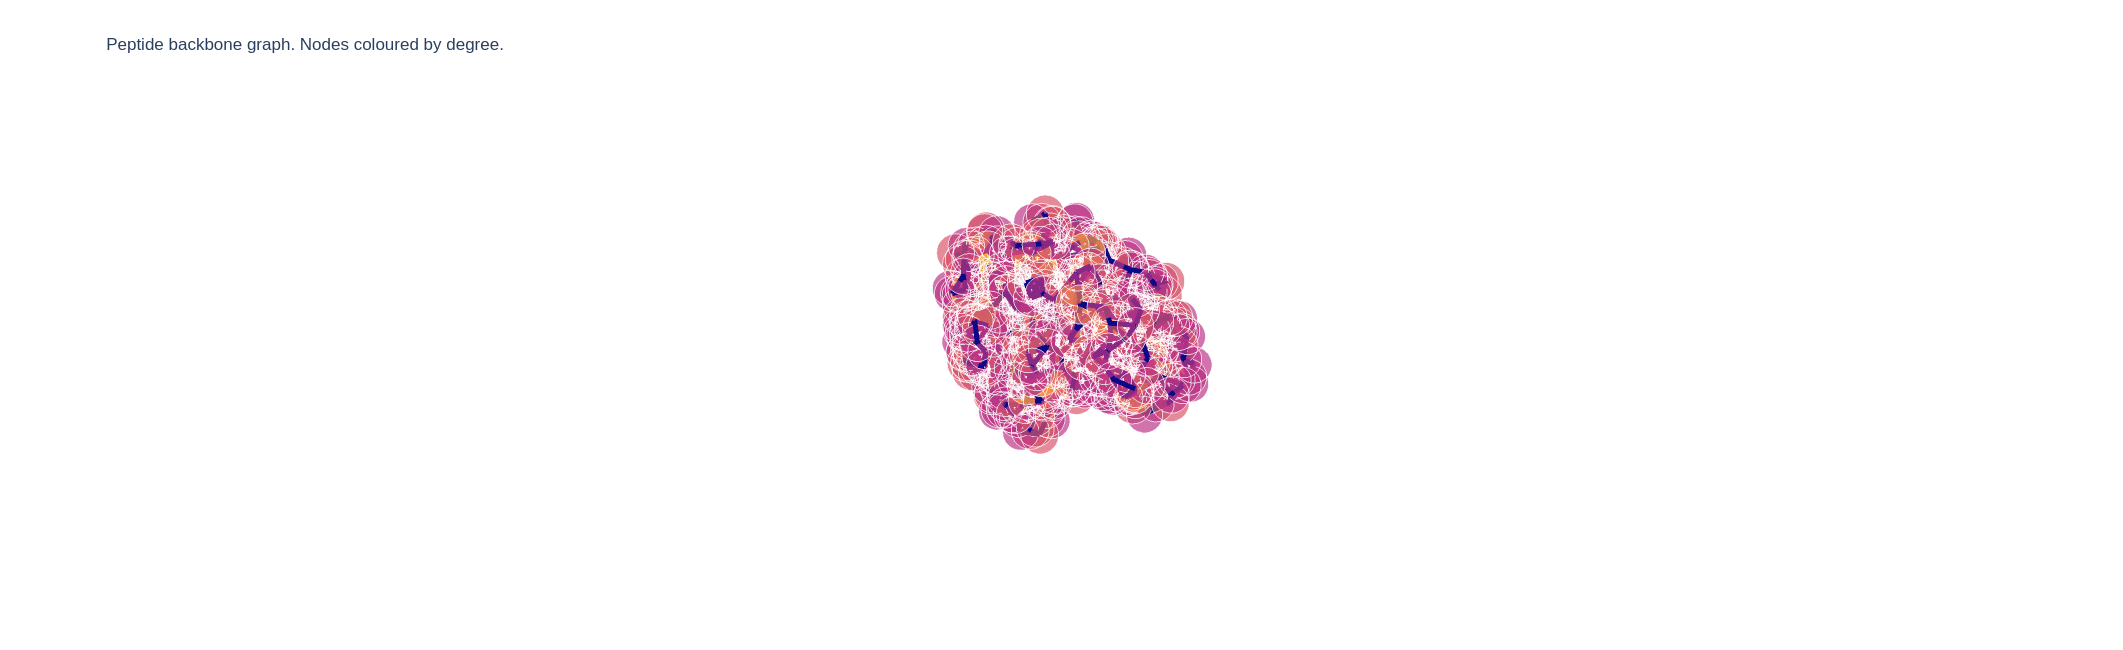

Processing...
  0%|                                                     | 0/3 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

[05/20/24 16:59:31] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=396012;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=689920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=180706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=843080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=574015;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=618836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=580041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=800646;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=820832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=862635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=579531;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=564592;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=585048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=966492;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=368463;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=483262;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=178799;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=548152;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=802321;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=397578;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=734766;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=402833;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=941977;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=828162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=861361;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=237912;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=631571;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=888504;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=427976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=884221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=163164;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=467004;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=365672;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=41570;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=256483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=228674;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=837777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=767319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=138324;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=647634;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=119145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=703572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=893319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=47763;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=777882;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=495832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260817;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=853094;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=495345;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=616689;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=637551;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=216986;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=933473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=468790;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=511221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=804081;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=407154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=180659;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=765652;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=632008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=17378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=982545;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=711077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=992293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=331920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=710502;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=210921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=378257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=472192;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=634044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=493220;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=29337;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=416400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=202918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=750392;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=223638;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=587787;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=529562;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=144572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=606481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=982576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=784281;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=147057;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=637258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=183188;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64797;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=226755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=178113;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=921745;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=475868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=471373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=913593;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=630776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=155610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=359795;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=492679;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=42173;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=848920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=823269;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=603630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=848968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=832345;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=737537;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=462453;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=23703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=52615;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=1527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=107915;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=955280;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=405553;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=541976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=635016;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=118940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=940606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=608460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=701984;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=741683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=717728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=136696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=861562;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=708831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=720618;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=343669;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=778078;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=428289;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=591597;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=874619;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=447029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=778131;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=402645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=970577;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=275913;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=580723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=439209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=937829;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=583469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=102284;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=387958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=241887;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=238011;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=167603;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=989005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=343831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=251619;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555774;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=485041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=768285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=655980;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=310734;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=157164;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=87307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=588110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=732703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=637561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=333932;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=494865;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=598854;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=576729;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=714142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=319940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=468480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=244037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=531189;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=597951;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=491687;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=912380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=962990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=495925;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=666764;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=750503;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=973236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=857152;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=348429;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=411069;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=183514;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=189588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=597371;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=151400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=963521;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=471292;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=443476;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=250296;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=779100;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=594021;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=996547;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=134369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440953;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=651782;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=874961;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=849543;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=205784;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=581102;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=723762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=444373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=635531;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=728261;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=151668;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=442300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=528538;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=31381;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=932917;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=735694;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=499316;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=184082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=37470;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=683958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=911152;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=501056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=87267;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=198692;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=8603;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=900232;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=259421;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=51772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=693713;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=719452;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=697391;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 16:59:32] WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=622960;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=898514;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=545457;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=328134;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=728914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=43191;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=113819;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=420447;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=963055;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=390183;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=5317;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=301586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=591844;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=387770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=562908;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=724847;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=674587;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=39110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=95600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=975674;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=368834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=557874;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=849980;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=760409;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=713222;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=60734;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=76960;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=967956;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=871601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=997031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=29291;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=610033;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=996263;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=971813;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=887564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=240730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=313307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=96958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=99672;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=407618;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=91044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=131890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=168085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=863589;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=295001;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=134585;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=767235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=712018;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=184631;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=490079;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=967057;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=927268;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=862065;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=951010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=340469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=7131;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=96373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=236052;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=498873;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=207368;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=699246;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=540908;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=926375;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=849871;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=545142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=256833;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=945284;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=436115;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=592525;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=650001;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=218070;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=221807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=191206;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=358407;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=481250;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=905736;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=640143;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=675395;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=645770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=653789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=101570;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=625888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=366832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=608401;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=570077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=645374;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=844285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=111311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=196512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=343746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=719592;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=54278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=931180;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=666629;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=597529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=184040;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=532355;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=33973;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=368731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=201899;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=735058;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=855873;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=61109;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=891472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=725101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=319369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=182515;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=604592;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=451743;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=625231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=534658;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=289093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=599177;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=661021;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=37812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=54158;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=914370;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=857721;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=16516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=432921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=669104;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=59129;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=691529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=980252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=4465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=69890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=703388;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=465090;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=592516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=44652;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=865271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=937747;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=329159;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=721504;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=130711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=318405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=831213;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=174998;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=247753;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=877543;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=449196;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=930475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=756092;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=775494;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=861786;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=578517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694324;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=791920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=816975;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=678357;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=986451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=892460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=188440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=786364;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=669001;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=754921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=701185;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=459926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=186945;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=755212;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=634353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=234578;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=355564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=565204;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=445264;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=674015;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=839278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=301232;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=659409;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=242636;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=896486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=253097;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=677879;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=674940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=316415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=142312;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=782188;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=719960;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=959883;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=125276;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=238260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=455190;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=59241;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=153525;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=634869;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=681579;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=450412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=550460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=431101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=537890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=274128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=147287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=179936;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=387556;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=268580;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=862481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=981356;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=451144;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=168174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=762376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=297440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=275485;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=915805;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=471755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=56110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=433676;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=512756;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=856704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579911;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=442722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=997242;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=778013;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=800568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=803568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=753232;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=734146;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=797414;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=176114;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=172547;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=6475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=202629;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=269382;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=881965;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=389254;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=959066;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=180831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=841225;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=600421;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=542235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579461;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=738110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=146920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181985;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=755415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=945333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=149198;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=719154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=460643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=197790;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=424545;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=382104;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=192247;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=537907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=684731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=890293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=56499;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=178757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=914662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=809048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=885084;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=563976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=986554;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=95926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=909280;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=386649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=316995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=180679;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=899075;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=463420;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=554951;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=422877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=335906;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=335958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=210421;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=434759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=397732;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=741788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=388683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=338065;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=412461;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=570696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=581303;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=8141;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=939880;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=920793;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=392478;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=249368;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=722682;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=821385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=322491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=225390;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=785353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=944851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=607387;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=577181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203925;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=256019;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=523725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=884111;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=321339;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=125041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=965940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=301792;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=321518;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=672876;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=330347;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=733284;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=84944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=929517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=566544;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=436204;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=684382;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=961773;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=169458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64346;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694175;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=870954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=197751;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=439044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=246265;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=473609;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=877010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=323568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=679258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=787728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=79140;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=314226;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=197622;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=382808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=984901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=128236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=714207;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=802524;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=746038;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=451167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=698582;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=862995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=96008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=798080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=35046;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=595964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=297909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=277636;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=563282;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=869455;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=659906;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=633547;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=974864;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=864158;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=844117;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=829398;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=328174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=31851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=584375;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=896540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=947576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=425124;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=232662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=868385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=13498;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=463404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=365212;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=817486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=388598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=99139;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=82463;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=373147;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=865858;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=42703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=178756;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=200920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=589440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=194412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=337218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=35277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 16:59:33] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=719255;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=506031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=353934;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=764688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=958626;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=781270;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=30645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=523664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=886535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=447942;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=621081;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=398590;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=500093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=917202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=422428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=599480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=829878;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=446268;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=875496;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=915820;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=457535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=974380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=536073;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=351249;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=346171;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=53384;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=361646;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=710687;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=175901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=782813;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=324909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=313747;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=933873;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=492422;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=306808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=456504;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=619977;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=372031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=874120;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=96812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=107436;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=548717;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=597683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=403488;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=482918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=554191;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=442136;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=513155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=902874;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=805555;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=957712;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=124472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=920443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=434512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=133274;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=6720;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=85357;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=749646;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=717926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=545513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=662874;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=581387;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=342314;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=826069;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=565460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=593351;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=347711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=231846;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=639022;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=372264;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=287716;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=382712;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=342391;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=704560;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=102640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=252852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=262124;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=148555;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=648536;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=680102;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=580187;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=927273;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=486472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=27490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=217990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=298007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=908584;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=76245;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=81414;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=449162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=701901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=404705;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=22281;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=694056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=643460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=365464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=797132;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=157281;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=321041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=317804;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=897416;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=123341;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=135452;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=100010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=97702;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=662169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=799528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=366569;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=94453;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=749697;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=112900;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=166452;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=41533;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=801257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=446927;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=512300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=618923;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=491372;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=309904;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=590385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=528334;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=784090;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=904888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=821441;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=870400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=88680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=601214;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=747772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=628825;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8953;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=25817;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=635609;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=114797;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=85937;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=326392;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=11734;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=395834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=222856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=491331;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=999246;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=636267;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=413780;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=111016;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=579856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=207411;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=929154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=880852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=74397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=101803;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=689342;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=166266;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=330006;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=850443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=917231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=982604;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=611352;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=924759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=521037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=379064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=911648;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=589335;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=729258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=471214;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=851870;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=138216;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=535117;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=391452;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=97111;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=628039;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=446261;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=495721;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=489119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=827015;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=548985;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=81794;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=931710;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=923231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=312145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=369910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=220583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=820484;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=261377;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=668878;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=788503;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=507305;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=61730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=704125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=790510;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=109738;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=753116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=391826;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=144451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=848641;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=224425;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=53706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=127434;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=578384;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=502813;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=780155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=43930;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=435795;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=595616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=952535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=274189;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=117351;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=571539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=834899;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=751512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=6539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=797480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=722244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=333058;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=753527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=733903;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=53340;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=320089;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=256045;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=631619;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=671064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=459855;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=553358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=964921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=865886;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=744573;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=960273;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=647273;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=521380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=102866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=884007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=144592;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=468490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=571007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=501261;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=804464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=557463;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=321755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=91387;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=91332;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=970276;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=998807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=30977;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=778835;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=152162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=273721;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=417820;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=359260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=662132;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=952748;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=921535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=129271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=217874;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=849085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=567293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=894450;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=649916;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=108656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=383161;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=228660;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=666293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=654197;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=379653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=451128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=891844;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=238312;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=57195;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=764114;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=877012;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=804723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=469759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=358244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=327381;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=242580;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=486323;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=534510;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=735498;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=58004;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=928745;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=709014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=924037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=574325;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=949566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=351014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=978607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=358363;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=927100;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=186828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=568526;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=97253;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=816311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=45874;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=991534;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=645923;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=687032;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=406350;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=906157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=985525;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=541234;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=276631;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=451878;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=327821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=273113;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=648918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260692;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=144003;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=56441;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=986500;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=309705;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=319372;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=994469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=704728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260075;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=191047;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=532686;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=48566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=960937;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=309691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=354876;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=985722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=118976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=910682;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=601239;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=544752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=580847;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=16368;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=478091;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=928841;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=742154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=184636;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=528365;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=524596;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=404083;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=166684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=722110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771148;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=400237;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=117468;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=136630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=99093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=895235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=837398;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=441308;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=738650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=147291;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=617027;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=887532;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=992062;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=421911;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=68859;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=704138;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=668585;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=719437;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=791643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=957382;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=712067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=926140;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=979451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=47450;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=462458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=842076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=247913;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=472472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=419775;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=313121;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=726018;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=872237;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=823759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=89311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=256034;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=105568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=610505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=258996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=486871;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=447319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=164524;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=763032;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=276286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=57621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=199696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=388110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=90500;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=427598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=554939;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=306036;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=528427;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=543830;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=450790;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=852970;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=779715;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=607532;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=930752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=378567;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=655164;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=868356;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=615819;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=421201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=93134;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=552854;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=582257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=67257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=641014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=836277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=293914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=356937;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=35632;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=833006;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=195745;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=636567;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=803268;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=134834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=276863;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=179851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=854479;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=234132;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=498927;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=214056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=919294;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=716481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=855658;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=701451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=966893;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=388215;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=64220;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=774802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=15927;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=939852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=82961;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=349455;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=546114;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 16:59:34] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=861689;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=789170;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=919180;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=208091;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=485843;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252398;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=930031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=595489;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=644889;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=542709;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=913819;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=67931;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=228651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=382287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=61343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=838757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=659558;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=394471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=230240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=766978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=773167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=516860;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=130801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=715196;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=868115;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=138563;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=462965;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=552219;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=962469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=637574;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=731128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=985521;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=908682;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=760229;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=658157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=427669;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=590485;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=603265;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=974051;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=918480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=468591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=476014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=627154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=237102;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=899460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=314617;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=467624;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=687306;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=57867;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=927599;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=168513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=720370;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=192681;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=428742;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=658477;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=651783;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=54199;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=105579;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=999108;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=779121;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=841860;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=616902;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=9192;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=586237;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=53295;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=409530;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=721260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=334044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=246169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=205446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=694722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=429538;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=256476;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=566148;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=546456;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=180343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=213781;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=651293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=462469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=635292;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=689156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=11598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=849331;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=54711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=278960;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=832992;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=321260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=819355;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=401316;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=883380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=747480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=294174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=479127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=90491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=728202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=777296;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=276650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=297368;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=450875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=10643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=254311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=31385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=596548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=117952;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=338297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=483914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=539338;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=939972;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=751341;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=530707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=744325;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=343231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=621575;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=174802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=945800;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=810651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=109700;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=391417;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=14679;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=160980;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=70726;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=852637;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=960725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=336017;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=673159;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=568141;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=842218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=651277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=221288;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=389456;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=365112;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=301599;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=276136;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=48126;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=268968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=685598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=101722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=491389;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=424602;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=134401;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=852851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=622918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=875983;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=276093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=553657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=588842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=295949;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555599;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=250415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=974654;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=243157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=402410;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=528167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=687845;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=815058;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=540664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=653119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=945762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=543710;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=257834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=71230;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260063;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=16109;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=493669;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=423770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=173570;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=667621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=950362;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=355517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=950362;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=514007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=786098;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=592240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=466584;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=910789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=323788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=33927;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=258933;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=236829;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=66678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=997749;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=262236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=95389;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=212399;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=56487;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=739682;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=597673;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=845757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=182614;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=127473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=779300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=852481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=674978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=691968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=189787;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=345912;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=761359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=503274;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=911210;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=974036;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=390069;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=477352;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=545683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=891449;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=730354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=402516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=32285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642074;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=769005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=983893;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=335986;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=890327;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=763480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=795515;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=232801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=45747;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=740952;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=238328;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=623757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=81703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=290764;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=625005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=842583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=797407;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=997488;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=994812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=80284;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=284451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=369705;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=340901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=98846;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=545404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=433611;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=555073;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=439509;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=44265;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=999845;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=135164;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=113359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=992889;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=638693;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=415287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=671772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=505155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=749165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=872278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=483290;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=356883;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=507384;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=855479;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=311563;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=359896;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=349166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=384001;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=443789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=477260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=649392;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=117304;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=548382;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=340336;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=645027;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=99844;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=879605;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=372257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=57352;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=81235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=188501;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=606586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=969814;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=672137;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=543474;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=232574;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=903128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=203360;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=409885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=888606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=674867;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=230327;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=766767;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=108154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=698607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=141591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=365846;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=798921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=168369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=156471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=364282;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=782980;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=688924;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=364419;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=442030;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=693446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=570546;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=315077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=412914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=540046;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=550087;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=864006;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=700796;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=419250;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=790988;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=511508;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=466561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=815954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=341537;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=259616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=273808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=456174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=849238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=509661;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=796411;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=562063;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=162371;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=445381;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=841278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=285978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=325101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=219408;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=501803;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=704435;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=143397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=461122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=685626;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=87704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=88791;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=823978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=611775;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=369694;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=427675;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=583571;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=509292;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=390848;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=326723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=566063;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=923106;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=865233;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=720220;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=269940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=896944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=415922;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=565018;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=445656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=234511;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=221508;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=338590;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=309462;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=877807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=622442;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=735244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=112074;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=785823;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=757689;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=856250;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=15871;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=79208;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=77670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=121076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=487052;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=752849;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=973212;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=16184;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=604645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=641015;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=45727;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=535891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=813579;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=78551;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=146754;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=42882;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=983140;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=569365;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=387310;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=470390;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=686328;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=915314;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=913354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=185415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=585269;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=527958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=611133;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=330707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=307070;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=311045;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=750606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=510627;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=461644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=368573;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=360019;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=211443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=596282;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=452319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=281685;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=828263;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414115;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=888593;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=828792;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=385824;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=401548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=520819;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=919968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=870849;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=798708;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=678107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=324043;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=278026;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=25839;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=666947;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=810877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=655710;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=925186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=43480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=563582;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=926842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=542302;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=954315;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=835093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=583138;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=646810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=485476;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=412271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=255235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=807077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=103751;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=711108;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=899461;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=310680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=818528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=279352;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=923367;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=79166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=308745;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=604860;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=823929;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=721276;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=778239;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=769254;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=310566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=626789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=166147;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=237122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=791008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=733502;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=14925;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=915544;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=709772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=603834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=536934;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=512904;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=668308;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=53551;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=499025;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=150855;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=99673;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=106486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=853407;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=733801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=121369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=565658;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=478315;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=643902;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=793521;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 16:59:35] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=981306;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=938593;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=793966;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=280726;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=47767;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=187653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=364614;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=408869;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=205108;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=380359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=284821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=761228;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=430054;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=384184;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=138350;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=213532;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=303913;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=619580;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=152862;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=729387;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=740919;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=353458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=117589;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=246484;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=69309;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=939388;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=86004;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=23260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=441775;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=812570;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=785778;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=529777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=901641;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=977270;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=324589;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=736576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=963816;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=959867;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=667661;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=17500;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=319228;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=415489;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=603659;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=922006;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=908981;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=673942;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=283877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=680493;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=320822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=955907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=191531;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=906618;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=137118;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=152287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=800116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=670546;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=443623;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=480920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=613620;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=500355;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=791049;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=647348;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=220319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=654576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=227271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=597369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=863576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=868085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=417007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=452572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=181724;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=469826;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=982376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=287588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=356562;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=375664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=582030;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=318633;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=982615;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=60343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=164446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=705473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=557260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=904193;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=685417;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=306641;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=48852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=257275;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=927943;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=339647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=670968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=665473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=510424;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=729502;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=968892;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=325707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=914674;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=3050;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=869409;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=184346;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=955270;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=866842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=557799;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=22011;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=833690;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=103875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=966614;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=124856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=967533;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=279854;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=991650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=826376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=458763;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=282054;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=483074;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=160709;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=646671;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=904350;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=380543;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=589397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=147354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=72771;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=681443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=390035;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=179796;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=49470;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=305062;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=889663;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=180139;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=46566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=216358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=545544;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=712498;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=867483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=270234;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=87607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=630866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=72893;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=28847;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=150116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=120505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=720763;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=885126;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=993094;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=80297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=570217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=379728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=38199;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=765315;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=620644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=707616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=809267;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=475067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=702760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=636926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=784330;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=572728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=375793;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=594179;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=441536;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=829272;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=583044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=689754;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=529198;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=151131;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=702290;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=70687;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=501386;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=368632;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=528271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=78297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=990832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=877358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=52181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=207106;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=911772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=24608;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=276507;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=548358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=373043;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=777555;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=564445;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=733596;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=949976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=584493;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=992790;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203575;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=363144;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=529892;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=906876;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=275708;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=407954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=428848;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=128495;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=972482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=305869;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=62482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=509875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=593271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=624908;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=655149;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=159601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=834162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=975695;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=670277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=344833;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=785922;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=6169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=575772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=180627;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=88994;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=201005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=553250;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=679513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=462168;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=708129;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=899934;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=937212;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=873781;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=900229;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=455563;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=649057;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=649912;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=967890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=63600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=127154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=804664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=534217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=89246;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=857348;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=621167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=876695;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=658698;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=414850;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=277209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=101963;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=953000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=946238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=898723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=432486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=393859;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=917787;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=63017;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=228583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=608283;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=270801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=750473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=667660;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=777528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=814500;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=62432;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=242185;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=953718;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=199146;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=531318;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=381209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=717055;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=987493;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=21414;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=958010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=713023;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=804891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=297501;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=730443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=942105;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=578337;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=546812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=845957;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=728022;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=715839;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=319777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=358640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=120970;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=60309;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=395436;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=716959;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=775351;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=697711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=413753;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=319393;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=582131;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=829067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=166113;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=612302;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=234574;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=161412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=544190;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=592698;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=817197;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=411696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=810702;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=775601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=633350;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=103367;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=444080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=621456;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=52295;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=50344;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=318435;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=36701;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=335811;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=710831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=486486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=650863;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=4929;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=392793;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=695666;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=68244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=332312;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=249002;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=844090;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=85421;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=914034;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=389217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=736052;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=81211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=292818;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=451812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=377155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=167971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=388202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=603856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=872000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=38222;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=558359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=261545;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=861544;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=445093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=323887;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=49248;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=696630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=979077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=649477;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=979622;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=407493;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=459117;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=652799;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=976342;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=758570;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=831464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=502156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=356642;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=751069;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=992880;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=286627;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=628828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=328641;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=136910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=828986;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=262900;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=115782;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=274046;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=199394;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=941477;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=677868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=28238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=214487;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=742288;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=873849;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=528250;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=766769;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=799959;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=426441;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=534184;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=19558;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=794959;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=445931;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=698128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=866064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771563;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=667338;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=246650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=268142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=40453;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440574;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=193640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=785600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=17838;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=351635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=354926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=201107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=583038;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=588881;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=574367;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=383954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=594202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=591818;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=408133;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=807610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=45759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=774903;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=965759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=948517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=535437;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=787148;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=736944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=325095;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=39199;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=813683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=66464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=925581;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=446416;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=288316;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=161173;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=314211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=474968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=295110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=45108;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=48398;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=629708;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=852866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=737718;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=243501;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=268467;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=477149;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=26901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=287067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=515077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=794553;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=924733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=666402;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=343633;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=841528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=599548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=295828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=151770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=600886;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=918656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=608877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=624713;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=868767;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=930812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=534127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=822605;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=541652;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=485243;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=175668;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=766956;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=725383;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=400297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=59787;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=150339;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=335187;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 16:59:36] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=698649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=787167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=90627;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=280083;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=79150;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=850411;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=560066;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=933384;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=106696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=818095;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=486177;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=690142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=730690;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=26693;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=974964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=701231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=191571;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=260679;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=978684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=451817;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=540050;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=218440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=477084;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=602851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=938449;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=175468;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=655600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=609670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=183784;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555699;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=239162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=803125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=805534;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=94433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=326821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=746927;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=671254;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=119102;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=47099;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=500360;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=884503;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=88207;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=420575;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=961360;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=490364;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=76085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=483474;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=228657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=112689;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=321271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=707694;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=658597;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=919796;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=601801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=359898;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=621889;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=774558;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=497673;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=586223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=482325;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=685601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=788472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=580733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=40579;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=172144;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=572513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=246131;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=10876;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=143453;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=283728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=190265;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=838564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=351942;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=618066;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=623065;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=530917;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=580353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=464714;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=167486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=668524;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=844029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=656785;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=567400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=29176;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=176169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=658072;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=417810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=41757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=664675;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=222363;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=27295;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=816801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=20229;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=721168;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=290733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=826214;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=639884;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=87848;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=195676;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=506130;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=845325;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=616727;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=595444;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=87324;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=965991;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=303907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=333148;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252225;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=230645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=254150;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=473022;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=15512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=352067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=806229;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

 33%|███████████████                              | 1/3 [00:31<01:02, 31.19s/it]

  0%|          | 0/128 [00:00<?, ?it/s]

[05/20/24 17:00:31] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=494595;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=953233;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=790699;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=833277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=176024;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=914106;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=178994;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=480725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=781922;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=12286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=99749;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=148130;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=422232;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=998731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=607560;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=454758;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=980707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=495758;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=386901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=370428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991170;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=613435;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=774789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=55775;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=78145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=547990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=260374;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=894672;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=290047;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=934733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=526193;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=448610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=966818;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=871554;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=884064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=282477;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332720;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=15819;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=19465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=489042;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=420387;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=391472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=488879;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=710965;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=666801;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=328325;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=792621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=797909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=589475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=883668;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=101056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=53286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181925;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=41891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=94734;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=535619;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=671369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=652531;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=589274;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=522516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=424852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=97295;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=500914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=727730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=988174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=560464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=847095;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=612273;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=734786;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=856893;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=106597;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=492595;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=951761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=218847;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=566885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=39635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=638585;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=77809;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=312342;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=913447;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=706153;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=257677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=962298;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=432474;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=435640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=344582;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=68533;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=605990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=566249;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=765064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=134124;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=721676;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=881511;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=981392;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=701684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=118397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=716533;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=83466;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=759240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=703169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=751890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=627765;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=330832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=612108;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=690210;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=54644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=651644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=345356;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=732697;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=39806;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=391665;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=496128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=508952;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=922678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=951901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=534793;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=173143;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=944247;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=198680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=491457;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=525827;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=234882;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=380631;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=456099;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=887706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=180490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=879251;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=421622;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=390491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=207606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=634704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=619145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=306262;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=789642;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=113935;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=140211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=190529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=575074;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=294877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=749064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=668051;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=205840;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=629681;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=240905;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=445724;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=18163;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=947191;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=49238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=978660;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=661706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=279945;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=385107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=280768;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=27453;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=389106;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=788996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=318174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=107298;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:32] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=660236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=998764;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=817333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=940223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=897902;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=532256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=379841;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=862371;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=59471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=573181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=928372;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=27540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=473740;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=475552;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=217588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=865170;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=292335;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=782416;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=631761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=530576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=980882;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=311588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=322475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=477347;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=763479;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=259150;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=898223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=546690;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=14564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414878;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=805066;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=416777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=551821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=177582;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203061;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=750829;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=915691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=812252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=466716;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=54042;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=974833;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=543112;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=895545;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=256535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=868978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=758231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=827010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=400563;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=575201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=975635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=242387;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=330329;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=422183;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=62788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=737280;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=740209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=31688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=461511;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=779412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=567951;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=880443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=265343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=676693;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=90699;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=891251;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=460244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=346173;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=927807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=444574;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=460549;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=786434;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=864865;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=329651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=351698;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=8185;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=144333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=845173;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=399606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=623204;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=284480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=237076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=575201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=752840;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=568181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=348358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=183987;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=919391;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=770170;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=96311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=82135;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=356620;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=769694;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=752206;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=516049;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=953444;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642595;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=415843;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=182000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=206016;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=708748;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=164123;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=965236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=249964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=731451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=530101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=825806;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=74683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=144162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=749632;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=167576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=658788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=871188;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=852889;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=58088;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=880966;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=244729;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=820359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=380015;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=426522;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=243984;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=853816;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=756865;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=370656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=744163;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=231348;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=852626;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=190528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=625482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=960044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=325796;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=124697;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=978613;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=283440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=818960;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=549454;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=312771;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=496329;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=227349;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=661495;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=182647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=524000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=290723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=356307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=516558;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=480646;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=303505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=927186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=745125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=302029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=948218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=24559;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=734890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=69668;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=967681;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=864539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=520619;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=602240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=375068;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=196730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=625310;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=513667;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=286365;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=114714;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=294918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=797670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=190257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=165076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=295473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=765037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=625535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=889957;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=680586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=535373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=655029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=516269;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=577330;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=98226;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=314691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=878917;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=1471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=886168;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=750541;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=973572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=124673;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=160261;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=748551;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=839376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=698192;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=860826;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=104548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=288918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=957838;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=327402;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=675318;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=398080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=62639;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=825755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=526559;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=12085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=123590;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=607429;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=937723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=93915;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=560146;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=626063;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=411008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=105329;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=561330;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=799297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=98520;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=70637;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=563263;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=677649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=997472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=788906;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=472086;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=834699;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=121720;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=817997;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=141545;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=734451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=253818;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=998879;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=874881;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=256236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=669250;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=434333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=199055;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=731840;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=166319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=242016;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=801116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=850857;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=2225;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=670533;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=309069;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=480970;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=319760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=697837;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=822932;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=197922;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=525215;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=149402;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=69946;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=128136;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=105609;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=853864;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=445124;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=932319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=524602;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=767563;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=964932;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=646535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=611133;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=878419;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=523468;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=229896;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260065;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=829107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=715567;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=95223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=370935;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=385299;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=576868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=891037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=706036;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=215912;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=346900;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=118243;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=140020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=683119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=272043;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=898597;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=299594;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=333768;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=333260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=851277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=798282;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=86240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=994396;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=592085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=321145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=782266;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=413578;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=25812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=234957;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=41843;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=389072;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=862418;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=907654;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=273897;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=751316;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=261685;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=680677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=297020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=82134;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=346955;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=851385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=137673;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=398286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=949984;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=959437;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=443880;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=401544;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=231471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=954656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=148020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=908772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=748312;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=746559;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=501574;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=551482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=48757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=7396;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=646059;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=57249;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=882321;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=526128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=35982;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=527081;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=324271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=534469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=773686;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=434915;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=697007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=850236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=462725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=685981;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=425339;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=733283;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=917860;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=18210;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=73887;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=259631;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=287901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=572319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=580186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=809904;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=283545;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=216192;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=957057;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=933112;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=464165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:33] WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=909731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757413;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=385314;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=674746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=951045;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=530538;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=568073;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=179941;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=415760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=459311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=541080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=929982;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=274305;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=944136;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=869161;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=700132;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=765177;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=920047;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=780128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=345540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=691048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=859442;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=759607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=145361;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=210914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=525338;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=292731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=408610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=115256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=263107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=552103;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=668968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=842741;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=853557;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=432630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=400930;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=108433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=125784;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=472610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=547063;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=775242;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=273627;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=115155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=801253;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=151640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=605160;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=82370;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=423711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=193561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=696655;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=578412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=992923;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=309635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=516701;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=424076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=874444;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=800006;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=204591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=717475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=40835;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=724178;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=268616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=778395;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=343661;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=484624;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=936798;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=612397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=972510;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=551363;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=704776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=298147;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=1650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=36899;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=495635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=210169;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=576699;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=791434;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=891751;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=259289;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=770288;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=923922;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=264483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=491809;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=808632;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=80495;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=438817;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=568740;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=608996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=589636;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=112030;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=653598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=299276;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=572329;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=532593;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=865032;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=659567;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=980468;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=122488;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8479;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=313731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=686237;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=292102;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=253743;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=872330;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=271101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=924032;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=527844;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=236474;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=42241;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=399527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=391469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=766223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=681458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181997;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=722231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=782816;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=946774;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555083;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=829830;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=125525;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=374785;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=936771;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=439949;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=857872;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=441522;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252587;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=282704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=72181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=15567;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=89998;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=463283;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=454383;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=637633;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=586197;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=932085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=619310;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=840218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=824706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=543688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=216060;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=957810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=100202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=88274;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=305963;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=465445;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=89056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=67811;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=906646;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=529945;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=478011;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=347158;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=459729;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=709268;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=787745;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=795836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=253376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=563465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=968265;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=812721;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=159561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771323;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=342307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=28194;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=355762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=929527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=726076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=692492;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=33834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=848907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=901629;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=926234;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=752619;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=651996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=645643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=391995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=956800;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=545966;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=595756;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=699123;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=64822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=493708;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=660976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=797121;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=596031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=922194;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=515607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=14029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=162189;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=172848;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=142203;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=877791;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=549350;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=133849;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=324517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=609956;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=239301;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=548767;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=257041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=227883;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=820963;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=821881;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=68392;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=465182;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=180955;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=419618;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=794415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=741866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=349197;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=473125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=919372;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=355080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=425919;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=955713;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=939822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=224971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=971671;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=984211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=415807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=766436;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=630495;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=820885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=37305;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=240977;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=812507;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=897770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=988933;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=818192;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=357925;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=198227;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=111433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=355034;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=354688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=160719;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=939599;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=317040;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=982435;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=952858;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=956491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=577661;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=816791;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=305435;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=356761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=74305;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=151189;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=713728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=831224;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=182168;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=236267;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=81903;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=251515;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=409499;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=83309;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64618;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=227305;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=239044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=356761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=365807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=424119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=431369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=449919;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=684662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=782631;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=586539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=188868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=507263;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=414804;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=393778;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=919181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=126101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=52549;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=314730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=557789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=893671;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=424264;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=781426;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=411653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=522023;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=498678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=315561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=600464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=598504;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=7104;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=284690;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=463808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=310872;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=434203;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=292463;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=680596;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=301497;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=596332;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=430860;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=233063;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=614042;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=288307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=852914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=999675;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=535767;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=350805;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=654641;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=884797;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=463101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=998870;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=237044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=957851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=301918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=690765;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=883886;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=951907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332200;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=366607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=662456;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=118243;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=784586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=531875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=569740;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=603307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=907753;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=7634;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=985130;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=966970;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=789781;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=792894;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=639504;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=365615;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=178645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=836547;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=315369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=296854;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559534;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=48400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=676651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=941164;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=377328;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=414978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=443573;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=880302;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=4452;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=473668;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=978412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=779044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=635407;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=911506;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=508459;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=608037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=298272;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=637053;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=447354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=360965;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=383345;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=617156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=868706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=603764;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=275662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=753572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=601714;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=791097;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=394128;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=835944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=72124;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=518125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=343947;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=597716;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=720690;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=175051;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=638647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=934045;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=44020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=102644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=916941;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=541570;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=59926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=857465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=514174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=398723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=731335;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=542207;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=25913;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=639823;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=169746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=752030;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=104805;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=193436;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=292478;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=396388;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=62340;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=245026;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=989139;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=831852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=275587;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=748629;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=957385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=557591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=680648;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=150327;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=62888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=371474;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=872039;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=460158;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=562543;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=442163;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=142707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=698905;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=931487;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=366319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=525700;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=638781;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=654160;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=159926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=533741;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=479360;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=540571;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=286086;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=687025;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=717919;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=970587;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=914863;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=746557;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=733764;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=116221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=247610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=391028;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=833552;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=217634;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=874314;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=113333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=376816;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=376737;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:34] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=138657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=327696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=586147;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=906420;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=736662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=667859;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=2272;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=107827;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=135838;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=551834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=544487;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=866245;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=9952;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=139586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=386979;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=396988;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=194218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=969844;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=641273;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=342685;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=494838;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=759429;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=585194;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=518161;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=837115;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=993507;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=898954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=756210;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=493339;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=586230;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=143248;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555420;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=676269;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=510373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555274;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=808763;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=917258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=150446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=309647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=324632;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=389888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=863252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=652861;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=807553;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=569489;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=758031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=301014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=991231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=120534;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=886605;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=490064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=63354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=178475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=110875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=105770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=178360;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=960005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=658396;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=848856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=118278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=223931;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=689294;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=10354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=503751;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=465656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=132363;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=780821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=380435;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=129004;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=33142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=668959;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=324720;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=99205;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=420606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=55742;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=653025;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=58285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=848735;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=464117;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=223082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=73880;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=575765;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=310715;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=302509;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=737338;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=388116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=129353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=2340;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=467810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=130963;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=459281;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=312664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=993788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=817285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=647760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=949428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=302242;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=820642;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=284512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=167652;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=658691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=668607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=209580;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=373458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=768503;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=839400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=121890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=669212;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252796;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=795753;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=487507;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=655280;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=542241;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=928973;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=902491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=398490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=786701;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=803541;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=700107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=294527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=79604;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=771687;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8362;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=134656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=265547;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=881906;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=388852;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=760808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=592353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=969999;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=396290;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=235568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=28389;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=164961;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=830703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757692;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=295971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=79524;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=512483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=447903;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=594364;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=80520;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=79708;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=780226;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=919802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=157591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=965358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=567873;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=9848;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=972546;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=676926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642230;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=260438;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=641747;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=167659;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=521383;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=959736;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=15307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=218763;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=843559;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=783482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=161355;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=437643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=101429;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=420733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=466724;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=919572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=359225;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=32544;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=590315;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=225221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=346369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=608529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=359933;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=716116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=57882;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=324478;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=559165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=46222;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=265438;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=995153;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=113720;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=763727;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=832016;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=364000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=576600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181557;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=883763;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=823512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=691395;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=814384;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=129944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=460812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=759031;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=249822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=412760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=492815;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=647261;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=631493;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=887954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=370725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=56512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=107470;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=83691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=15924;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=687524;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=85773;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=915241;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=546768;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=381162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=273775;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=966713;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=121281;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=759321;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=998681;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=326680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=878918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=207065;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=908119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=768962;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=206530;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=602758;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=116322;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=930684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=396365;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=171609;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440414;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=597806;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=669146;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=110357;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=639760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=344451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=547682;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=853670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=701573;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=906726;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=958143;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=735957;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=641502;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=952572;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=668810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=641256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=688966;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=709428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=481115;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64183;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=36056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=821246;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=148388;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=142941;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=18705;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=111761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=770278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=644975;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=274151;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=649167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=576454;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=803222;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=455835;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=551048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=606248;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=664454;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=333757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=733023;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=274705;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=825602;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=573885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=208737;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=519928;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=986070;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=645550;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=306983;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=921429;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=122787;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=681579;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=487165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=470373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=818876;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=147264;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=176403;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=820444;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=628005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=943837;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=183611;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=409287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=888866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=960697;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=614657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=874522;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=185053;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=909792;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=584704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440299;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=986326;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=35223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=688581;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=918616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=54158;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=833358;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=662636;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=836924;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=527296;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694152;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=798958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=131449;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=102564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332531;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=193614;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=569807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=728784;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=590672;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=160238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=271921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=22969;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=924573;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=489195;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=833651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=467467;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=554650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=828639;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=161399;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=67707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=905975;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=592186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=374599;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=677540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=427748;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=15959;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=935868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=57465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=978168;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=290874;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=268586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=447422;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=436246;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=27569;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=963217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=762459;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=963864;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=367473;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=684649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=98512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=545329;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=937512;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=505302;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=403416;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=744988;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=876267;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203604;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=13266;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=918252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=262936;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=613768;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=985455;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=499074;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=635205;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=382398;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=949810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=75791;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=908006;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=373802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=562556;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=834186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=346926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=106426;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=122291;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=276290;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=580677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=307693;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=698513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=146583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=298508;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=405404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=411451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=34765;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=140380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=175870;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=753738;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=292833;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=85751;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694754;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=51868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=56566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=250968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=855761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=362246;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=473564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=648566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=116957;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=479117;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=369489;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=173624;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=588836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=165115;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=320886;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=834333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=690405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=526275;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=957481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=783284;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=225089;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=623846;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=692367;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=136584;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=22624;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:35] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=354445;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=771165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=891655;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=444761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=697514;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=797271;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=534441;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=286997;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=950475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=384833;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=662421;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=741696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=786343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=576426;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=605048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=371439;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=241103;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=820367;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=793788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=596165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=622378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=736620;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=278670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=458219;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=217855;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=861256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=351007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=27907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=850851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=611334;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=953405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=73238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=864664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=995581;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=78958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=278739;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=696056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=41302;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=626089;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=771270;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=773206;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=474889;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=663307;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=224310;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=187834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=24611;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=494938;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=278791;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=5604;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=53449;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579114;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=624467;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=923650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=132972;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=964834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=375174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=583731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=897694;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=707167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=739199;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=795143;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=430532;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=515211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=351913;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=994737;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=481906;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=243216;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=696818;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=215059;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=528918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=672477;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=198012;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=824643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=660390;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=508605;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=255714;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=74484;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=955048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=155808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=716901;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=436679;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=554370;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=457753;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=344638;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=708910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=111293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=887186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=518761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=91909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=47139;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=963225;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=55053;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=173153;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=858623;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=140394;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=893527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=885780;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=664211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=501101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=544175;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=239518;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=231788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=809513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=193911;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=947301;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=23258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=916915;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=143733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=339107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=777261;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=433163;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=33709;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=135947;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=14240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=113378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414141;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=419917;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=422863;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=366518;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=501840;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=884077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=311684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=366929;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=53971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=691523;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642956;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=870748;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=510171;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=360482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=493731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=956998;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=289308;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=942851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=699921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=858437;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=456591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=833403;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=880080;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=460191;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=271942;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=88799;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64049;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=318612;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=781361;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=113122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=801643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=954160;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=671258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=854910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=657726;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=643166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=937838;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=452601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=621754;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=42112;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=23180;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=59989;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=486371;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=853086;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=519895;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=186666;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=867773;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=363042;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=723406;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=707393;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=740439;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=639481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=73217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=427549;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=372293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=184130;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=407713;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=277493;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=109908;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=261129;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=42005;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=750343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=192831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=98407;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=406256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=703176;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=886168;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=490133;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=149389;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=798208;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=420359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=90776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=47103;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=552469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=735842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=116971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=453489;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=613605;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=383595;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=653562;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=59075;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=100585;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=503748;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=785597;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=16233;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=385902;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=291505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=410423;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=716199;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=66346;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=58810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=530157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=436738;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=754729;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=790926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=674251;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=585029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=261722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=148642;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=782529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=407840;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=277265;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=696481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=688385;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=990695;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=800157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=418981;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=670055;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=578378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=561469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=846764;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=797964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=817185;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=107884;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=462779;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=767590;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=827200;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=934704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=374351;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=205242;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=542742;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=766914;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=425672;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=276310;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=47443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=872432;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=212935;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=30996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=379082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=566579;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=371486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=706395;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=681509;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=769580;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=759196;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=669411;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=93007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579850;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=743122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=789207;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=453187;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=441381;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=774974;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=947939;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=756445;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=881491;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=372357;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=404200;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=260921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=481732;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=49583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414953;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=649946;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=845441;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=537707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=469025;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=268347;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=457875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=641684;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=472386;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=441426;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=886708;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=726172;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=360332;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=493215;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=30920;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=756142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=282964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=260936;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=394651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=818119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=862259;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=334996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=989909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=343867;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=623093;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=955014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=412680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=527337;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=774943;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=548229;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=644319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=371038;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=936695;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=774286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=114899;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=27678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=640420;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=34520;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=963678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=474209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=71127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=66081;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=306058;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=229559;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=784894;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=953960;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=248847;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=855729;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=964296;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=484405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=519324;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=581591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=379938;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=228723;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=266490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=518645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=697849;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=125319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=849436;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=14013;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=208599;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=569107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=227990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=92097;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=387182;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=856622;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=914257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=438104;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=493457;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=143318;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=255281;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=82334;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=744236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=569586;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=241431;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=393157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=235211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=532436;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=644669;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=508345;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=220927;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=703107;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=953297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=383067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=466952;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=584142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=944276;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=499783;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=123455;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=261964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=32967;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=756742;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=695790;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=500578;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=425321;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=624881;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=659973;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=871550;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=808600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=125592;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=920490;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=665580;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=738890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=489650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=959908;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=262762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=998460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=753734;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=410600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=556301;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=109537;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=599773;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=182369;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=206066;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=696081;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=338120;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=213759;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=683003;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=952649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=800899;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=825505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=931144;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=584725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=848475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=910238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=102333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=409770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=615940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=763076;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=945958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=123568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=5665;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=947990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=441497;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=956034;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=487036;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=861402;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=705480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=835451;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:36] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=74238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=121028;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=893980;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=852165;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=307583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=68224;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=749674;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=849014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=512352;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=141019;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=788967;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=2560;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=593648;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=793085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=258221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=519156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=43440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=619219;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=367353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=762719;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=870583;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=948536;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=270457;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=774842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=985023;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=625156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=134985;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=927578;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=387446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=135303;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=876555;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=276155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=736256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=73497;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=465406;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=758988;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=28193;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=774752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=549566;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=42073;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=894209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=413836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=80380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=711816;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=784836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=981711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=575223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=291673;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=482343;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=966471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=668067;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=526145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=282610;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=983086;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=524494;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=298647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=419915;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=125947;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=666838;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=49131;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=624132;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=13357;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=760468;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=394670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=672784;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=784269;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=816000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=344526;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=626567;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=366604;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=650961;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=587239;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=156725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=766899;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=519020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=790237;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=746449;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=745400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=158551;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=221831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=244190;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=812405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=25596;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=157320;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=382659;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=468410;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=809129;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=47828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=847325;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=133235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=257993;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=572020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=853846;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=641240;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=189215;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=270964;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=636159;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=711507;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=92370;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=208278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=978885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=517621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=936336;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=663612;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=154961;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=65253;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=833182;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=708442;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=113289;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=468701;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=570068;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=635752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=124207;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=45993;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=154863;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=789500;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=228511;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=885413;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=422983;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=104202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=330437;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=369478;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=727366;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=280189;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=570089;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=794594;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=118268;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=996757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=430856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=84260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=954696;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=57072;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=543986;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=979652;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=928188;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=80587;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=116747;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=543469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=663771;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=165805;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=276951;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=835958;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=253653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=799228;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=142505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=111596;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=920224;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=682231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=11218;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=477354;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=111235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=486655;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=957346;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=339828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=469822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=335750;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=872016;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=870374;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=12396;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=111445;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=617702;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=513765;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=582024;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=129913;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=707831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=643979;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=769502;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=61662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=386893;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=745805;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=560676;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=967380;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=833267;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=908477;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=768733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=46783;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=682309;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=888837;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=83012;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=498648;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=727640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=960630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=876777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=352941;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=850777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=954657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=950373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=75263;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=316616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=874702;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=6825;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=634807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=539766;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=324872;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=675008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=287652;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=456179;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=94624;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=987651;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=662772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757993;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=398243;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=294832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=223841;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=411628;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=473428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=35988;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=389788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=726804;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=854851;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=852746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260827;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=15746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=123680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=673677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=502300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=366559;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=475855;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=535909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=839718;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=66119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=987910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=271118;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=184472;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=750355;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=152317;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=70193;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=612894;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=972000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=402959;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=382746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=703276;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=484136;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=18701;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=516053;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=158368;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=342791;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=900621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=174640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=846984;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=101468;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=838448;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=891010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=25150;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=371875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=146408;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=390678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=664990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=924195;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=538628;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=277616;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=837894;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=562643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=149772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=595333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=436800;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=62433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=665470;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=673754;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=885122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=836644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=403122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=669177;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=669508;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=282749;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=883396;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=378645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=898417;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=94264;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=738177;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=777853;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=456238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=141322;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=579420;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=44030;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=476594;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=655277;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=575039;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=390347;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=50184;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=351998;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=37316;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=974601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=149649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=143110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=697826;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=265826;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=268866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=971785;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=907048;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=711520;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=894719;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=82010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=971835;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=321653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

 67%|██████████████████████████████               | 2/3 [01:32<00:48, 48.72s/it]

  0%|          | 0/58 [00:00<?, ?it/s]

[05/20/24 17:00:53] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=606408;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=215896;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=373134;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=798769;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=532746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=390971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=13327;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=731172;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=889499;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=75608;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=137975;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=453534;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=519319;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=417332;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=511898;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=660653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=420601;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=555872;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=716995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=666747;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=300464;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=254280;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=232548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=79858;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=577948;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=939331;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=644990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=160187;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=681845;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=807001;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=785104;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=925760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=397614;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=151484;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=777614;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=654956;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=662990;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=216288;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=31589;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=871404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=363635;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=695353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=820668;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=352606;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=270378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=824530;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=401940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=635797;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=293844;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=96383;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=189013;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=495767;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=472292;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=572413;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=887755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=520035;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=498247;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=93540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=335511;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=695879;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=579311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=432303;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=374220;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=838397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=534393;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=486285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=598124;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=151944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=134828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757814;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=959337;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=540479;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=816064;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=218784;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=489393;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332881;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=7458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=27044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=667893;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=677314;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=436621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=818241;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=609059;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=634375;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=514044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=814143;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=777221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=584967;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=540941;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=377370;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=924627;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=759274;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=49766;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=109152;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=952719;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=806137;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=176755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=228153;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=480688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=213310;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=977772;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=66762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=793090;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=154733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=809087;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=809088;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=251561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=189330;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=154029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=342300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=753731;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=73591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=951700;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=507634;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=59258;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=444365;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=267516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=683471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=865428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=681995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=658653;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=31939;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=370437;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=299484;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=757068;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=96483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=209475;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=865804;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=35994;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=489823;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=584;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=913603;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=879975;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=947445;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=625166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=136403;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=998819;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=543386;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=685962;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=226155;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=672670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=193109;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=959341;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=888241;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=364300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=167492;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=426656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=237528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=956629;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=454727;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=127041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=652014;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=931768;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=202434;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=736145;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=770024;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=454367;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=178323;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=450068;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=50439;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=108890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=730159;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=148402;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252255;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=815236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=590742;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=664714;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=177196;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=302082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=493026;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=749125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=122799;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=128085;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=770174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=246622;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=353430;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=175257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=928223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=309776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=250127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=412257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=932678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=762397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=194605;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=408346;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=398746;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=686012;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=611353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8112;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=294201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=12173;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=723677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=149458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=895656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=724947;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=266200;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=276650;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=700505;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=318646;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=259590;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=440907;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=115130;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=75446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=958540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=966353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=394824;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=172842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=107687;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=624126;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=333856;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=850209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=65032;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=644481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=828096;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=150756;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=299837;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=468144;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=262295;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=34877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=737643;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=381132;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=20457;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=574939;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=124326;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8306;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=863858;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=943211;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=239902;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=789007;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=158303;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=996082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=161110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=13891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=890539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=276760;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=366376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=741664;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=391969;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=192872;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=968424;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=644820;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=991918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=306286;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=718243;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=513870;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=713677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=55096;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=523800;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=661458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=522220;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=44279;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=298167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=94626;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=285940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=780932;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=317244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=829389;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=735079;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=839236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=80728;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=864940;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=402383;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=702939;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=674157;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=545256;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=311748;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=870730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=622885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=591335;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=643346;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=900181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=594576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=21866;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=609222;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=575426;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=228427;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=188224;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=307293;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=815459;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=492099;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=111309;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=352523;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=308840;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=754177;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=307647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=681120;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:54] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=321208;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=927353;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=226454;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=926628;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=691020;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=298454;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=172722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=597830;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=58;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=415680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=9471;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=740951;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=819257;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=178456;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=878209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=104212;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=64405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=753877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=60430;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=809360;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=262302;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=626087;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=540884;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=605427;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=82516;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=725675;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=590704;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=20647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=27834;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=621091;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=956654;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=87232;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=145089;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=285154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=573628;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559585;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=806621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=196337;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=722802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=382711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=236539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=930388;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=438017;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=149996;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=411260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=159661;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=988008;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=737818;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=271098;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=533521;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=886425;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=28463;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=165943;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=785130;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=600086;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=495734;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=501812;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=371711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=658478;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=973400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=504691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=431272;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=662088;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=164260;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=274562;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=104458;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=902830;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=174929;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=262166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=2045;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=205934;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=256830;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=851397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=500822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=627264;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=404196;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=588066;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=408252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=459875;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=998887;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=334082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=912414;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=116401;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=858707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=559707;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=503568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=552598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=941446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=209945;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=372541;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=414236;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=239055;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=145775;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=706078;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=116891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=926443;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=128657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=84089;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=835364;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=138431;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=875876;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=706000;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=687497;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=376548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=739294;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=751938;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=212036;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=49949;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=346777;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=265658;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=174657;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=851422;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=582808;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=977376;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=751028;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=527413;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=648197;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=454503;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=222532;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=446412;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=923985;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=715372;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=340909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=568125;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=803633;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=427962;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=376847;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=604529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=738379;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=91798;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=876770;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=632891;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=266015;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=335591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=29252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=452662;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=570439;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=816284;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=58220;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=515848;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=953783;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=12517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=666174;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=605039;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=186588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=897670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=252649;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=818195;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=481783;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=736202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=860576;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=338757;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=940562;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=851364;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=644674;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=170156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=292995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=289351;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=810542;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=716656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=386966;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=436885;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=237827;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=909640;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=391944;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=924902;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=868216;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=353244;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=81823;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=736209;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=442341;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=691450;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=778207;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=628765;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=402502;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=882004;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=954768;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=302074;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=94659;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=69750;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=273703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=854691;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=484481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=9807;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=104947;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=102771;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=660285;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=131090;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=319880;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=770821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=278146;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=314564;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=26815;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=317092;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=997377;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=671133;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=99344;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=369202;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=601498;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=114513;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=769644;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=542034;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=621741;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=968645;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=560208;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=74568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=604238;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=694373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8075;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=647802;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=142703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=713823;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=243575;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=838043;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=910584;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=191054;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=238815;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=885053;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=462275;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=771025;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=150578;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=712992;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=592301;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=435139;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=620037;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=139983;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=620712;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=578896;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=46752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=161527;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=821779;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=320186;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=381483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=48624;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=420114;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=784771;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=870626;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=387535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=429141;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=401400;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=446485;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=249721;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=616330;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=185017;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=470308;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=736799;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=864362;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=790828;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=121598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=133729;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=300785;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=651500;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=815778;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=559879;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=196497;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=469869;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=8127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=628287;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=806062;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=407263;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=146985;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=104942;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=773733;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=629943;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=633404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=473926;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=888317;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=472716;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=181811;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=309976;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=594102;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=538018;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=425716;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=101526;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=596706;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=405393;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=902022;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=299430;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=370002;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=814413;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=169022;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=675776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=524870;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=497296;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=792317;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=510397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=93683;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=557948;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=478262;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=546932;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=282087;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=791894;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=56416;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=861439;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=697092;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=740291;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=640003;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=958557;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=244378;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=38910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=946039;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=602032;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=298194;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=182142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=897762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=941810;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=169201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=699677;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=345453;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=809987;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=474364;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=530991;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=182535;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=958829;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=908167;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=297849;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=386973;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=5588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=331896;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=399539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=670515;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=279722;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=466969;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=968737;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=188231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=878906;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=925923;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=411231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=938101;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=757903;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=73598;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=180210;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=211143;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=424231;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=899082;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=614868;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=642890;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=687621;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=198918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=860180;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=205352;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=476679;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=341252;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=6119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=66326;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=912730;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=711600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=79630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=760889;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=372135;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=581280;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=138002;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=629995;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=895970;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=249703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=213480;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=426678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=687656;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=379460;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=337288;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=970915;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=678291;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=348217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=111560;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=704647;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=130537;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=639296;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=729609;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=907455;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=954116;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=771446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=642278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=298201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=440546;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=151568;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=844822;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=436175;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=477249;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=266481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=993697;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=458339;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=195044;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=43411;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=452592;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=544835;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=39465;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=129486;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=219922;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=282217;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=442410;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=539859;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=910973;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=686488;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=304127;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=453069;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=764973;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=920778;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=983470;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=951534;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=619404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=128366;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=551077;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=234156;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=152997;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=356735;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=660332;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=974762;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=696999;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=993909;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=215967;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=848830;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=169709;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=70789;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=524060;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=995571;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=436181;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=462528;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332939;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

[05/20/24 17:00:55] WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=749;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=397237;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=949094;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=208444;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=329888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=959628;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=188548;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252741;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=803917;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=66841;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=354485;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=10561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=108703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=451904;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=846328;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=423408;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=376459;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=562776;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=598434;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=69216;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=103750;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=938333;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=590483;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=612214;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=619342;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=373295;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=426311;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=667103;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=552678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=478529;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=709383;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=505179;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=84148;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=452681;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=345112;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=125415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=577788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=145741;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=20921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=208154;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=626278;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=181715;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=87918;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=5752;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=139282;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=502070;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=368670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=923659;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=549129;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=981551;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=935591;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=10877;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=498676;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=523068;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=152428;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=462725;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=440449;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=851625;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=35539;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=21714;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=731888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=185359;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=984702;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=84755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=759526;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=637600;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=271561;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=405300;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=544607;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=973122;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=646688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=106738;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=976744;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=157208;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=326715;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=709530;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=821968;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=167788;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=316957;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=167811;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=239025;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=252226;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=464813;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=332336;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=378029;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=986225;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=902384;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=586121;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=702946;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=482832;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=688447;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=983051;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=852831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=963761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=198056;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=528969;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=314440;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=242414;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=734678;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=663971;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=828700;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=125404;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=260469;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=508223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=750588;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=18769;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=408166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=327033;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=879053;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=744321;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=762935;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=845446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=337541;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=960215;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=360162;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=87332;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=180482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=239697;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=884482;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=57954;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=22235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=448809;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=958129;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=822397;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=377379;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=945142;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=259813;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=187050;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=881123;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=790373;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=259629;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=289613;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=535407;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=503341;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=997945;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=366887;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=902641;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=66245;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=129628;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=13821;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=868068;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=871405;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=111630;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=215681;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=132463;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=323433;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=516836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=473670;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=702190;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=454796;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=77046;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=907839;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=151703;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=96010;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=850793;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=946197;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=666201;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=674661;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=749179;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=205221;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=204117;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=768897;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=334498;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=891137;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=650921;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=873110;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=396992;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=464978;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=141761;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=131992;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=442910;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=38418;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=35462;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=205974;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=158823;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=348836;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=299297;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=873103;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=805517;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=877831;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=422842;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=388982;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=307298;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=293254;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=131003;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=174617;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=136680;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=261195;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=462393;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=439481;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=176235;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=986062;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=829210;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=457546;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=49223;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=403166;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=484888;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=375699;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=786755;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=869415;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=901294;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=115347;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=776711;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=222180;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=86106;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=162565;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=114041;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=571434;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=16688;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=568870;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=708446;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=835119;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=986806;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=304191;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=502540;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=203228;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=202438;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=124164;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.object_. The only supported   ]8;id=503214;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=365176;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=153213;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=585511;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

                    WARNING  can't convert np.ndarray of type numpy.str_. The only supported      ]8;id=985549;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py\conversion.py]8;;\:]8;id=358690;file:///home/q31032mw/miniconda3/lib/python3.8/site-packages/graphein/ml/conversion.py#324\324]8;;\
                             types are: float64, float32, float16, complex64, complex128, int64,                   
                             int32, int16, int8, uint8, and bool.                                                  

100%|█████████████████████████████████████████████| 3/3 [01:49<00:00, 36.66s/it]

done
ProteinGraphDataset(314)
314



Done!


In [12]:
### Graph Creation methods: ###
## 4. K nearest neighbours ##
from functools import partial
from graphein.protein.edges.distance import add_k_nn_edges
from graphein.protein.features.nodes.amino_acid import amino_acid_one_hot
from graphein.protein.visualisation import plotly_protein_structure_graph
from graphein.protein.graphs import construct_graph

new_edge_funcs = {"edge_construction_functions": [partial(add_k_nn_edges, k=4, long_interaction_threshold=0)],
                  "node_metadata_functions": [amino_acid_one_hot]
                  }
config = graphein.protein.ProteinGraphConfig(**new_edge_funcs)

g = construct_graph(config=config, path=absolute_file_paths[0])

p = plotly_protein_structure_graph(
    g,
    colour_edges_by="kind",
    colour_nodes_by="degree",
    label_node_ids=False,
    plot_title="Peptide backbone graph. Nodes coloured by degree.",
    node_size_multiplier=1
    )
p.show()

### Create an in-file dataset for passing to pytorch geometric ###
## Note: this can take a while. If the dataset already exists it won't be regenerated ##
from graphein.ml import GraphFormatConvertor, ProteinGraphDataset

# list of columns included in nx ==> pyg conversion #
info_list = ["edge_index", 
             "amino_acid_one_hot",
             "node_id", 
             "chain_id", 
             "residue_name", 
             "residue_number", 
             "atom_type", 
             "element_symbol",
             "coords",
             "b_factor", 
             "kind", 
             "name",
             "chain_ids"]

# NetworkX to PyG conversion #
convertor= GraphFormatConvertor(src_format = "nx", 
                                dst_format = "pyg", 
                                verbose = "all_info", 
                                columns = info_list
                               )

# Convert the graph_label_map dictionary to a list of tensors # 
graph_labels_list = [torch.tensor(list(label.values())) for label in graph_label_map.values()]

# Convert paths to a list of paths
paths_list=balanced_reordered_labels['paths'].tolist()
# Create the dataset with graph_labels as a list of tensors #
dataset = ProteinGraphDataset(
    root='/home/q31032mw/Dropbox (The University of Manchester)/Max/17_ML_Project/Rank_1/20240307_KS_dimers_Reduction_State_K4_DH_ER', 
    paths=paths_list,
    graphein_config=config, 
    graph_labels=graph_labels_list,
    graph_format_convertor=convertor,
    num_cores=4
)

print("done")

print(dataset)
print(len(graph_labels_list))

In [16]:
from sklearn.model_selection import train_test_split
### Data loaders ### 
from torch_geometric.data import Data, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_add_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the dataset into training, validation, and test sets #
train_ratio = 0.8
val_ratio = 0.19
test_ratio = 0.01
batch_size = 64

# Define your custom Data class with __cat_dim__ method
class MyData(Data):
    def __cat_dim__(self, key, value, *args, **kwargs):
        if key == 'graph_y':
            return None  # Indicates that 'graph_y' should be batched along a new dimension
        return super().__cat_dim__(key, value, *args, **kwargs)

# Create a list of Data objects, ensuring 'graph_y' is a 2D tensor [num_examples, num_labels]
# Initialize an empty list to store the modified Data objects
data_list = []

# Iterate through your existing ProteinGraphDataset
for graph in dataset:
    # Create a new Data object
    data = Data(
        edge_index = graph.edge_index, 
        node_id = graph.node_id,
        coords = graph.coords, 
        name = graph.name,
        num_nodes = graph.num_nodes,
        graph_y = graph.graph_y.view(1, 2), 
        x=graph.amino_acid_one_hot.view(len(graph.node_id), 20),
    )
    # Append the modified Data object to the list
    data_list.append(data)




# Extract labels from your data_list
labels = [data.graph_y.tolist()[0] for data in data_list]

# Split the data into training, validation, and test sets with stratified sampling
train_data, test_data, train_labels, test_labels = train_test_split(data_list, labels, test_size=test_ratio, random_state=42, stratify=labels)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=val_ratio/(1-test_ratio), random_state=42, stratify=train_labels)

# Create DataLoader for training, validation, and test sets
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

print("Train_set:", len(train_loader.dataset))
print("Val_set:", len(val_loader.dataset))
print("Test_set:", len(test_loader.dataset))

def count_labels(loader):
    DH_count = 0
    ER_count = 0
    total_count = 0
    
    for batch in loader:
        # Extract labels from the batch
        labels = batch.graph_y.squeeze().tolist()
        
        # Count mal and mmal labels in the batch
        DH_count += labels.count([1, 0])
        ER_count += labels.count([0, 1])
        total_count += len(labels)
    
    return DH_count, ER_count, total_count

# Calculate label composition for each loader
train_DH, train_ER, train_total = count_labels(train_loader)
val_DH, val_ER,  val_total = count_labels(val_loader)
test_DH, test_ER, test_total = count_labels(test_loader)

# Print the results
print("Training Set Composition:")
print(f"DH: {train_DH} samples, ER: {train_ER} samples, Total: {train_total} samples")


print("\nValidation Set Composition:")
print(f"DH: {val_DH} samples, ER: {val_ER}, Total: {val_total} samples")


print("\nTest Set Composition:")
print(f"DH: {test_DH} samples, ER: {test_ER}, Total: {test_total} samples")


Train_set: 250
Val_set: 60
Test_set: 4
Training Set Composition:
DH: 125 samples, ER: 125 samples, Total: 250 samples

Validation Set Composition:
DH: 30 samples, ER: 30, Total: 60 samples

Test Set Composition:
DH: 2 samples, ER: 2, Total: 4 samples


DataBatch(x=[54400, 20], edge_index=[2, 125068], node_id=[64], coords=[54400, 3], name=[64], num_nodes=54400, graph_y=[64, 2], batch=[54400], ptr=[65])
Epoch [1/70] - Train Loss: 0.6934 - Train Accuracy: 0.5080 - Train AUC: 0.5051 - Validation Loss: 0.6934 - Validation Accuracy: 0.5000 - Validation AUC: 0.4767
Epoch [2/70] - Train Loss: 0.6923 - Train Accuracy: 0.5360 - Train AUC: 0.6406 - Validation Loss: 0.6928 - Validation Accuracy: 0.5167 - Validation AUC: 0.5589
Epoch [3/70] - Train Loss: 0.6917 - Train Accuracy: 0.6120 - Train AUC: 0.7157 - Validation Loss: 0.6924 - Validation Accuracy: 0.5500 - Validation AUC: 0.6344
Epoch [4/70] - Train Loss: 0.6911 - Train Accuracy: 0.6800 - Train AUC: 0.7557 - Validation Loss: 0.6920 - Validation Accuracy: 0.6500 - Validation AUC: 0.6944
Epoch [5/70] - Train Loss: 0.6904 - Train Accuracy: 0.7080 - Train AUC: 0.8127 - Validation Loss: 0.6917 - Validation Accuracy: 0.5667 - Validation AUC: 0.7167
Epoch [6/70] - Train Loss: 0.6900 - Train Accura

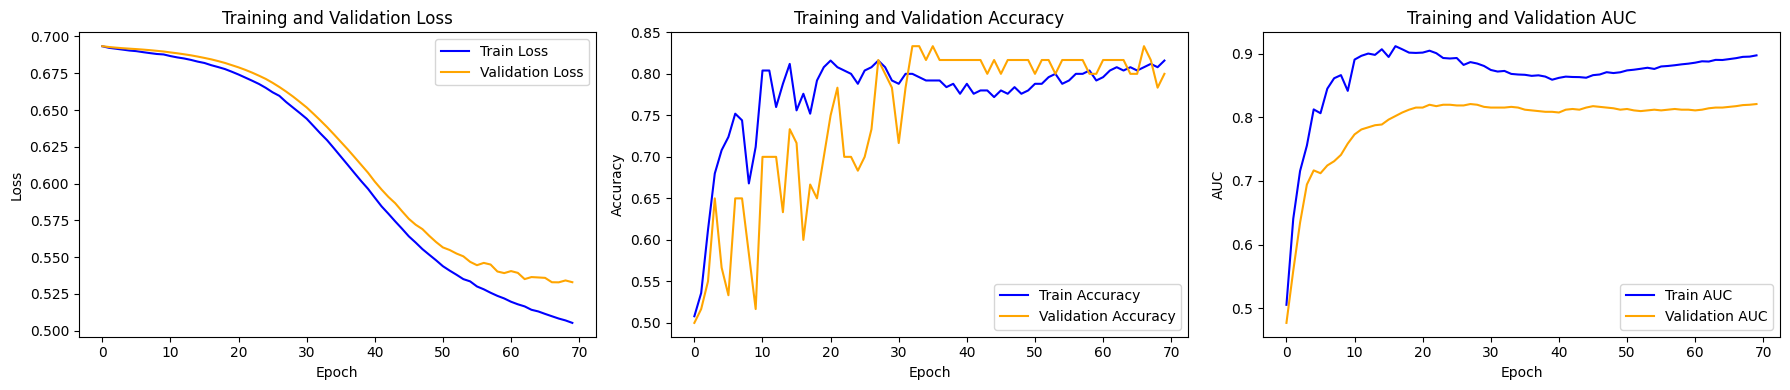

Training finished!
Test Accuracy: 0.7500
Test AUC: 0.5000


In [18]:
### Training and validation ###
import torch
import torch.nn as nn
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool
from torch_geometric.data import DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Set seed
torch.manual_seed(15706112877486103401)

# Network parameters
input_dim = 20  # Corresponds to amino acid OHE
hidden_dim = 64 # Neural network density
output_dim = 2  # Set model to binary classification

# Hyperparameters
num_epochs = 70
learning_rate = 0.001

# Define a GNN model
class MyGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, batch):
        # Convert input tensor 'x' to Float data type
        x = x.float()
        
        # Apply the first graph convolution layer
        x = self.conv1(x, edge_index)
        x = x.relu()
    
        # Apply the second graph convolution layer
        x = self.conv2(x, edge_index)
        x = x.relu()
    
        # Perform graph-level pooling (e.g., global max pooling)
        x = global_max_pool(x, batch)
        x = self.lin(x)
        x = F.softmax(x, dim=1) 
    
        return x

# Initialize your GNN model
model = MyGNN(input_dim, hidden_dim, output_dim)

# Define batching
batch = next(iter(train_loader))
print(batch)

# Forward pass through the model
out = model(batch.x, batch.edge_index, batch.batch)

# Define optimization method
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Empty containers for loss and accuracy metrics
train_losses = []
val_losses = []

train_accuracies = []
val_accuracies = []

train_aucs = []  # New list to store training AUC values
val_aucs = []  # New list to store validation AUC values

## Training and validation loops ##
for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    total_correct_train = 0
    total_samples_train = 0
    train_predictions = []  # New list to store training predictions
    train_labels_all = []  # New list to store true training labels
    
    # Training loop
    model.train()
    train_correct_count = 0  # Total number of correct predictions for the epoch
    train_total_count = 0  # Total number of samples for the epoch

    # Validation loop
    model.eval()
    val_loss = 0.0
    total_correct_val = 0
    total_samples_val = 0
    val_predictions = []  # New list to store predictions
    val_labels_all = []  # New list to store true labels
    
    with torch.no_grad():
        for batch in val_loader:
            batch = batch.to(device)
            out = model(batch.x, batch.edge_index, batch.batch)
    
            labels = (batch.graph_y[:, 0] == 1).long()
    
            loss = F.cross_entropy(out, labels, reduction='sum')
            val_loss += loss.item()
    
            predicted_labels = out.argmax(dim=1)
            total_correct_val += (predicted_labels == labels).sum().item()
            total_samples_val += labels.size(0)
    
            # Store predictions and true labels for each batch
            val_predictions.extend(out[:, 1].cpu().numpy())  # Detach not needed for no_grad context
            val_labels_all.extend(labels.cpu().numpy())


    
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        out = model(batch.x, batch.edge_index, batch.batch)
        
        # Convert graph_y to binary labels
        labels = (batch.graph_y[:, 0] == 1).long()
        
        # Compute loss
        loss = F.cross_entropy(out, labels, reduction='sum')
        epoch_train_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Calculate accuracy
        predicted_labels = out.argmax(dim=1)
        train_correct_count += (predicted_labels == labels).sum().item()
        train_total_count += labels.size(0)
        
        # Store predictions and true labels for each batch
        train_predictions.extend(out[:, 1].detach().cpu().numpy())  # Detach the tensor before converting to numpy
        train_labels_all.extend(labels.detach().cpu().numpy())
    
    avg_train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    
    # Calculate training accuracy
    train_accuracy = train_correct_count / train_total_count
    train_accuracies.append(train_accuracy)
    
    # Calculate AUC-ROC for training data
    train_auc = roc_auc_score(train_labels_all, train_predictions)
    train_aucs.append(train_auc)
    
    
    # Calculate average validation loss
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    
    # Calculate overall validation accuracy using all true labels
    val_accuracy = total_correct_val / total_samples_val
    val_accuracies.append(val_accuracy)
    
    # Calculate AUC-ROC for validation data
    val_auc = roc_auc_score(val_labels_all, val_predictions)
    val_aucs.append(val_auc)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Train AUC: {train_auc:.4f} - Validation Loss: {avg_val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f} - Validation AUC: {val_auc:.4f}")

# Plotting the training progress
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_aucs, label='Train AUC', color='blue')
plt.plot(val_aucs, label='Validation AUC', color='orange')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.legend()

plt.tight_layout()
plt.show()

print("Training finished!")

### Test data ###
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have your test data in a DataLoader called test_loader
# If you don't have one, create it similarly to how you created train_loader and val_loader.

# Set the model to evaluation mode
model.eval()

# Initialize variables for accuracy calculation
total_correct_test = 0
total_samples_test = 0

# Lists to store predictions and true labels for potential further analysis
test_predictions = []
test_labels = []
test_probabilities = []  # New list to store probabilities for AUC

# Iterate through the test DataLoader
with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)  # Send data to GPU if available
        out = model(batch.x, batch.edge_index, batch.batch)
        
        # Convert graph_y to binary labels
        labels = (batch.graph_y[:, 0] == 1).long()
        
        # Calculate predictions
        predicted_labels = out.argmax(dim=1)
        
        # Accumulate the number of correct predictions and total samples
        total_correct_test += (predicted_labels == labels).sum().item()
        total_samples_test += labels.size(0)

        # Store predictions and true labels
        test_predictions.extend(predicted_labels.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_probabilities.extend(out[:, 1].cpu().numpy())  # Store the probabilities for the positive class

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)

# Calculate test AUC
test_auc = roc_auc_score(test_labels, test_probabilities)

# Report the test accuracy and AUC
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Processing batch with 40 graphs
Explanation for graph scnS2_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


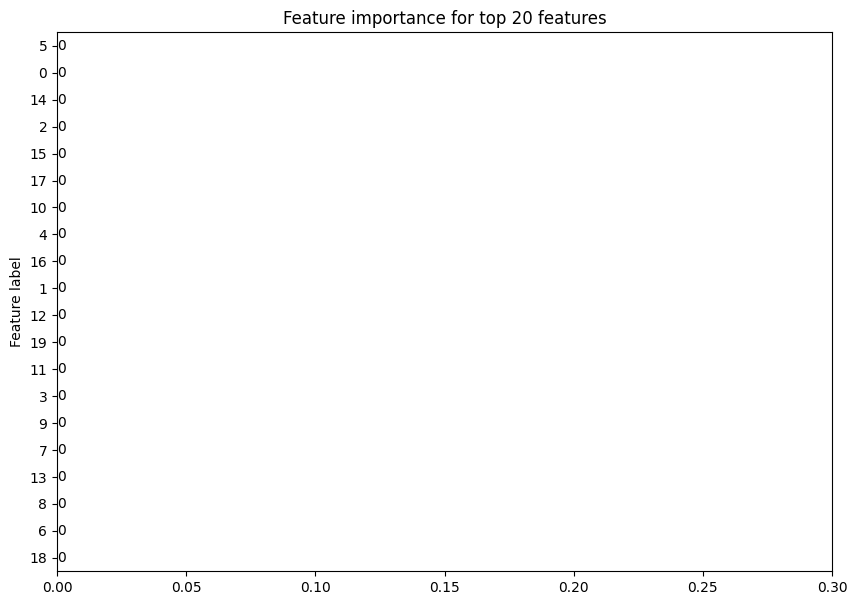

Explanation for graph cle6_Mod.4.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


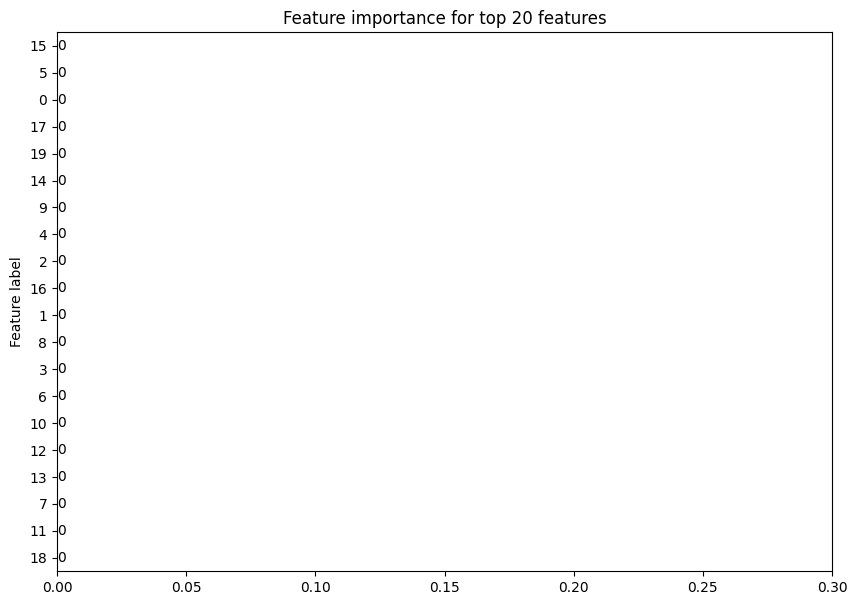

Explanation for graph nidA2_Mod.1.pdb_aligned: tensor([0.0000e+00, 2.7939e-11, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


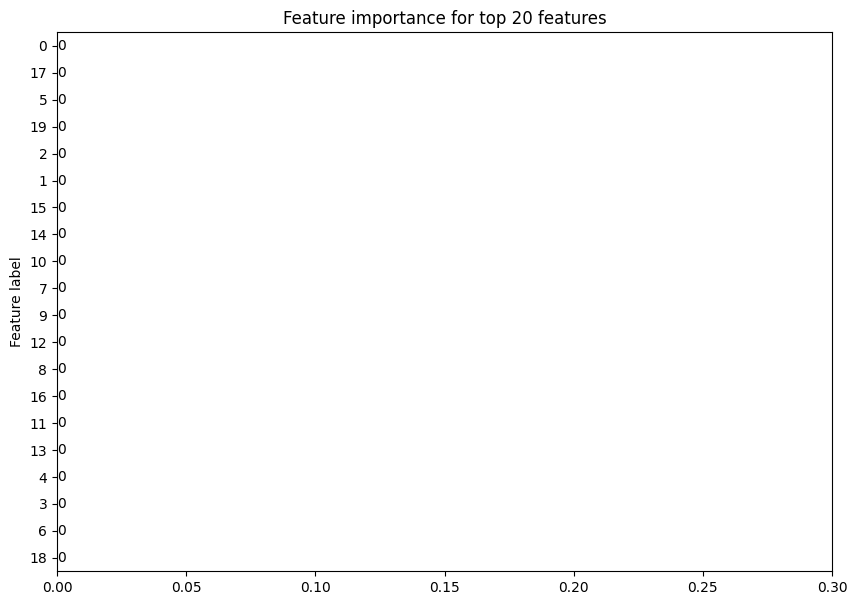

Explanation for graph aizD_mod.15.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


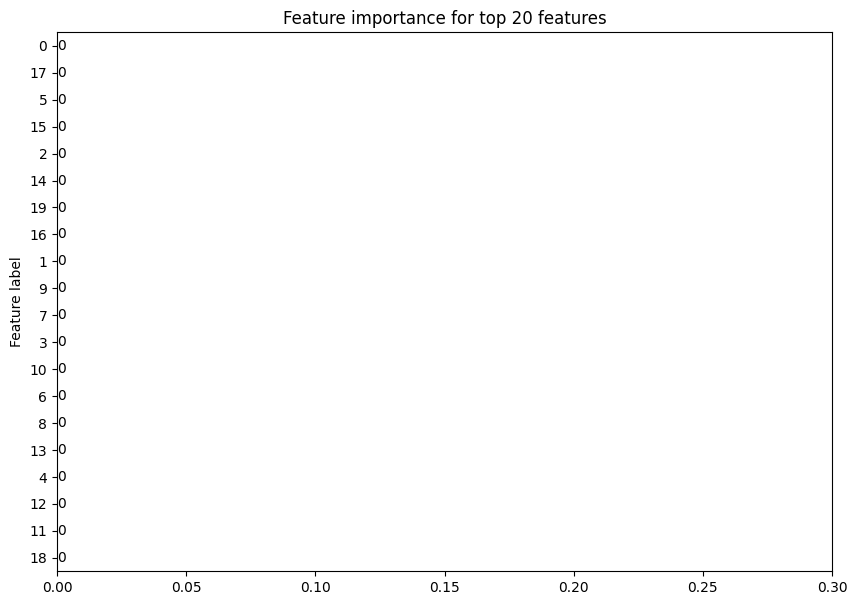

Explanation for graph nbrH_Mod.1.pdb_aligned: tensor([3.1976e-11, 3.1979e-11, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


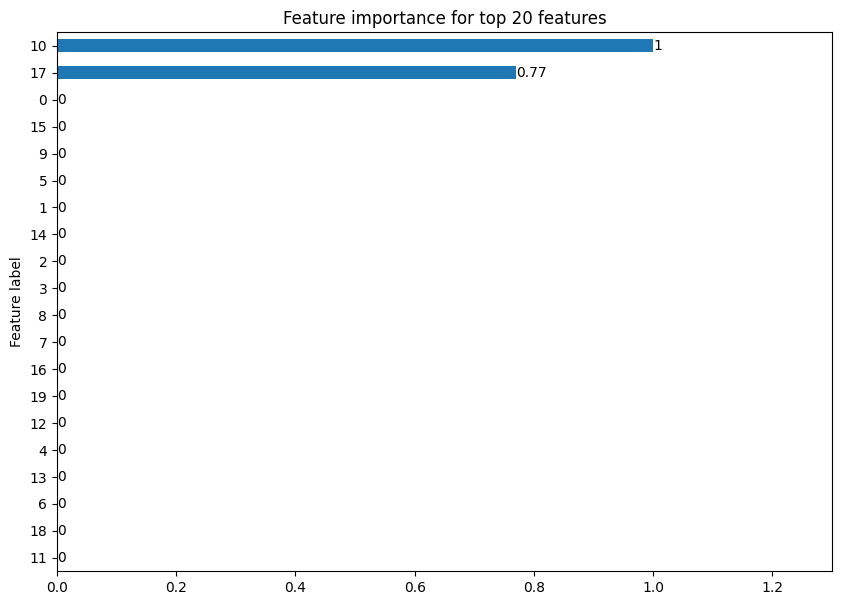

Explanation for graph simC1C_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


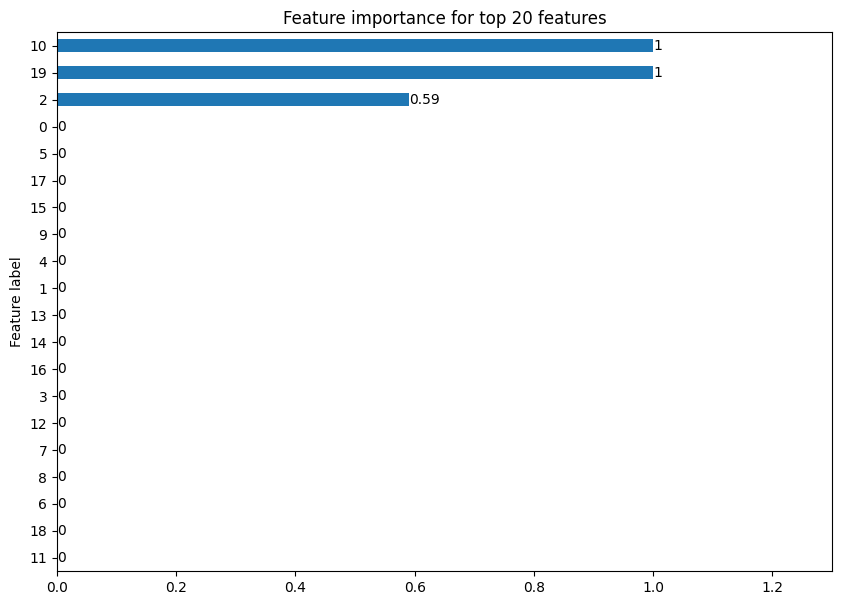

Explanation for graph nbrH_Mod.1.pdb_aligned: tensor([3.1972e-11, 3.1975e-11, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


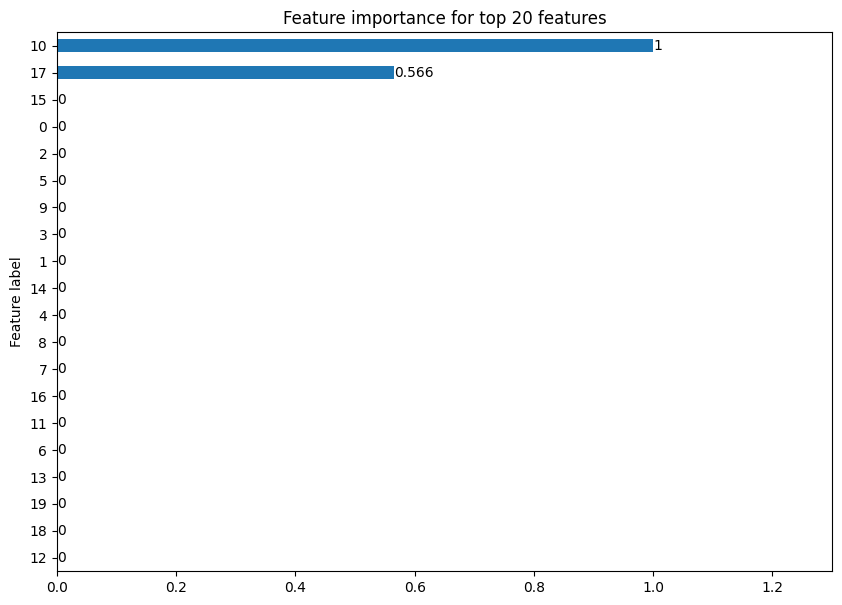

Explanation for graph lydF_Mod.12.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


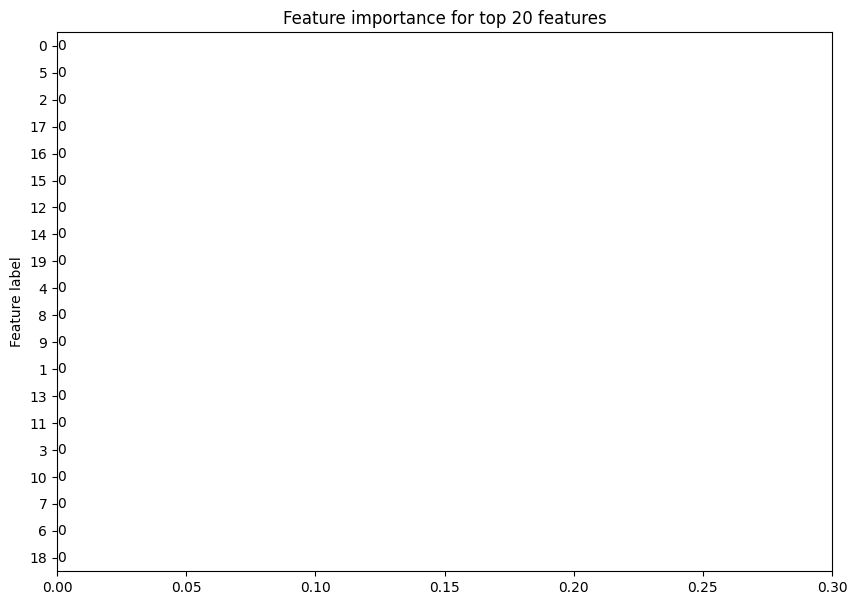

Explanation for graph merC_Mod.7.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


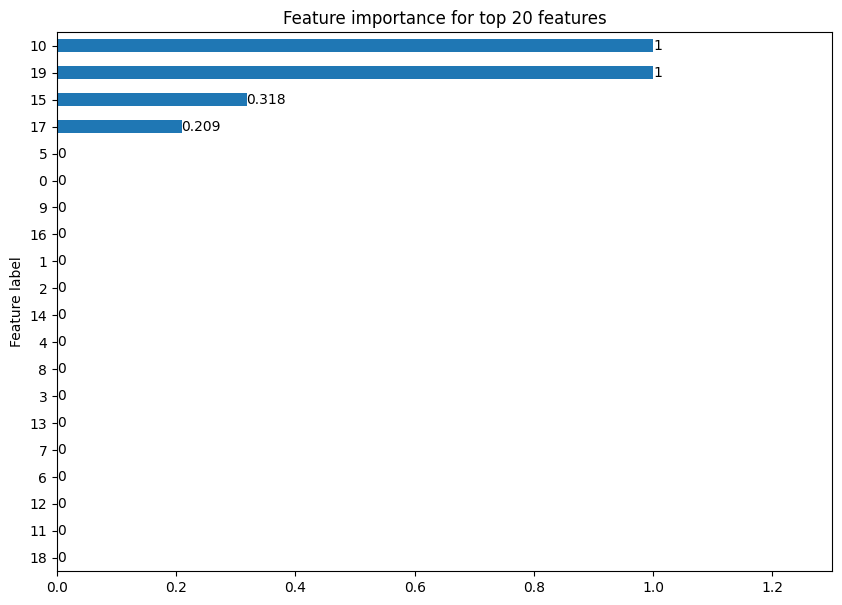

Explanation for graph aizH_mod.26.pdb_aligned: tensor([3.3135e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


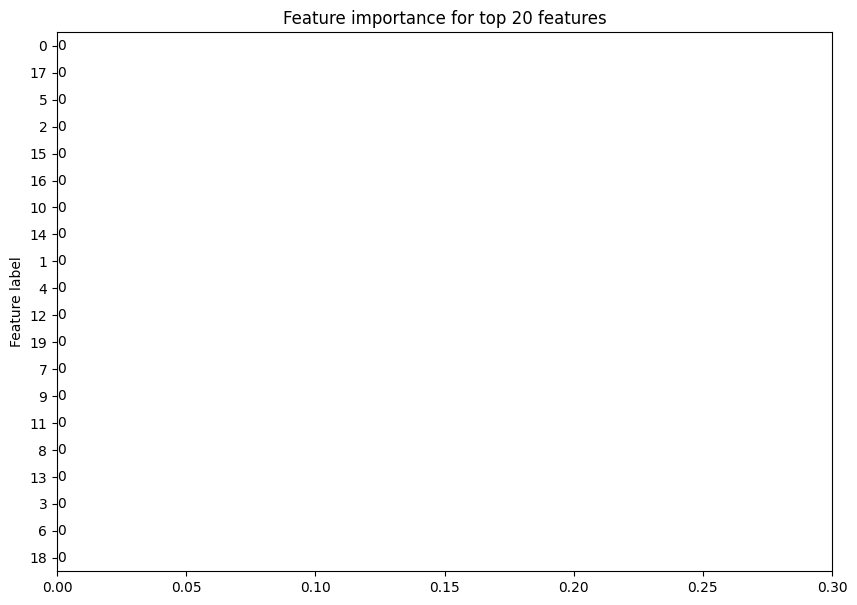

Explanation for graph tmnAV_Mod.2.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


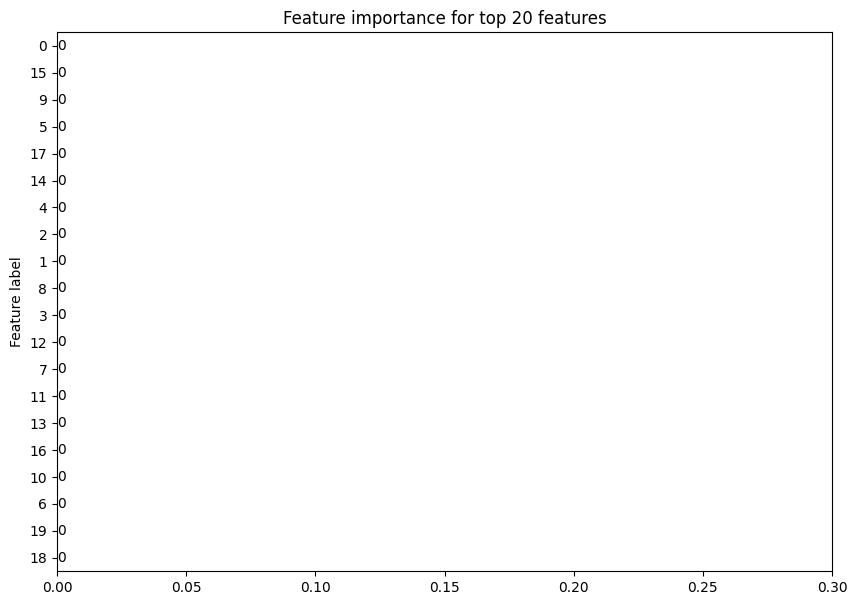

Explanation for graph olmA5_Mod.11.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


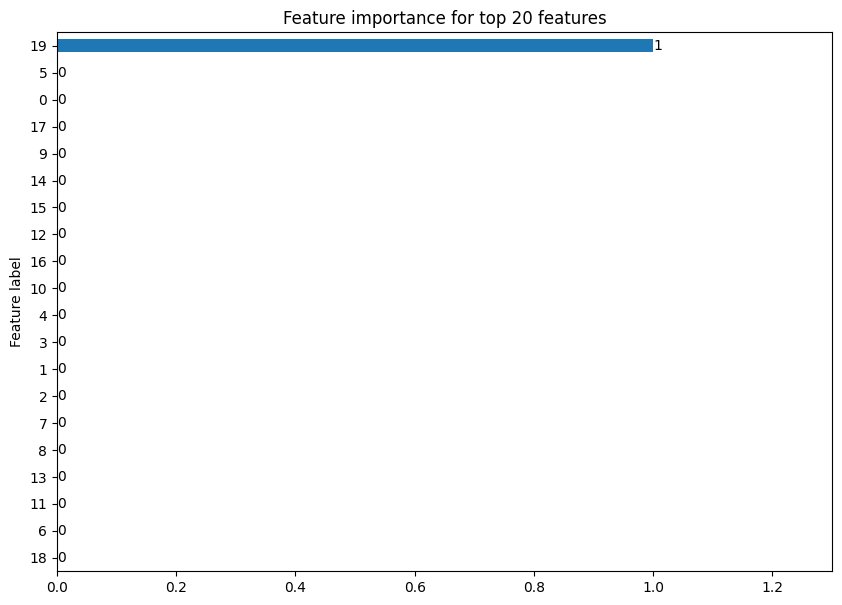

Explanation for graph ncdB_Mod.4.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


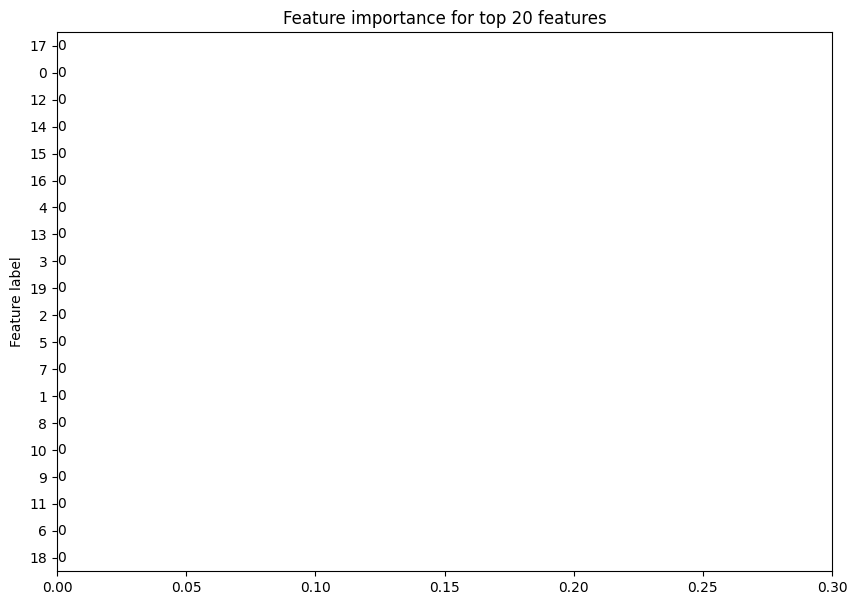

Explanation for graph lkmAIII_Mod.1.pdb_aligned: tensor([4.0632e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.1712e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


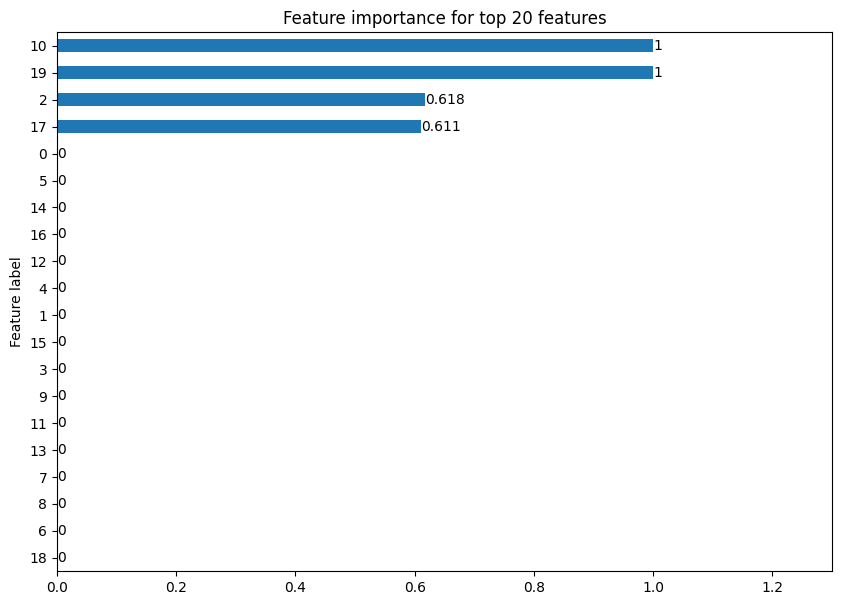

Explanation for graph divK_Mod.2.pdb_aligned: tensor([4.5833e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


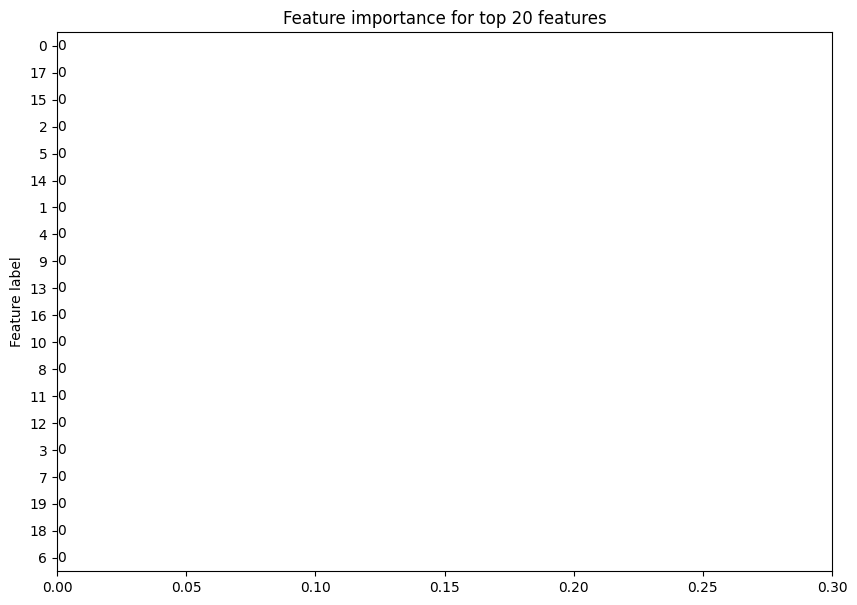

Explanation for graph npmI_Mod.19.pdb_aligned: tensor([4.2368e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


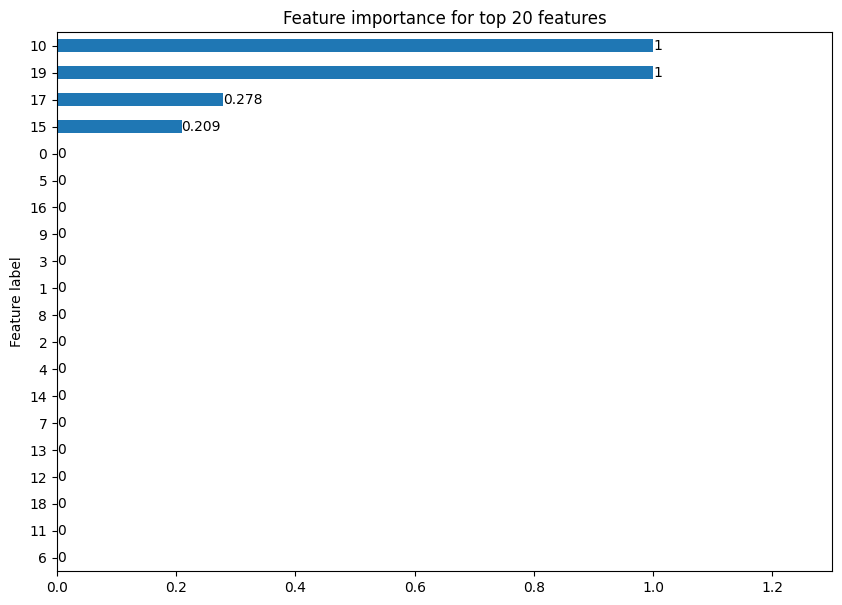

Explanation for graph norC_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


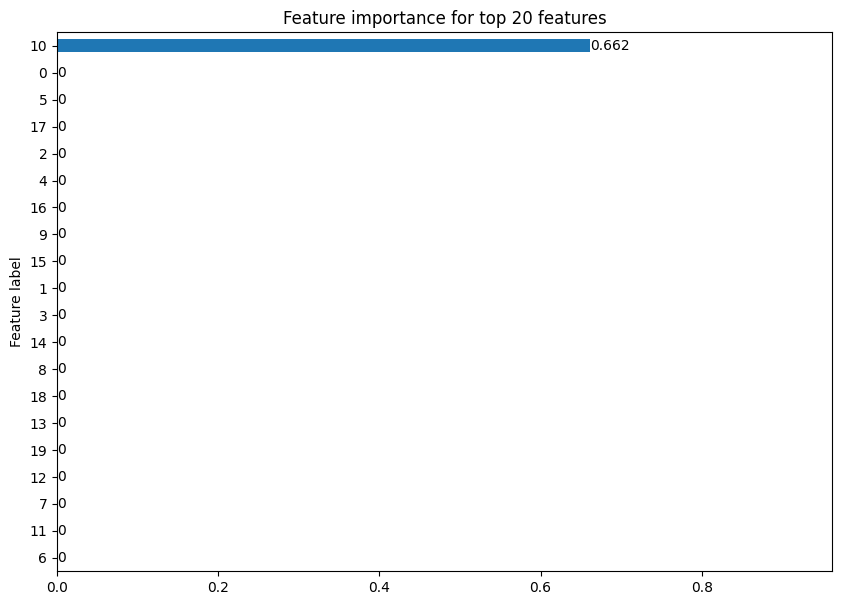

Explanation for graph ttmH_Mod.3.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


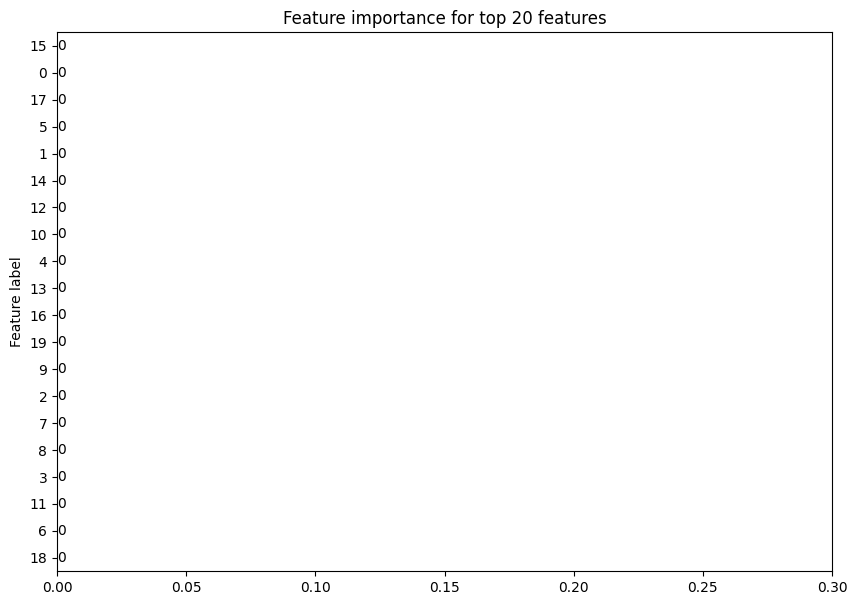

Explanation for graph meiA3_Mod.2.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[3.3839e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.2524e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


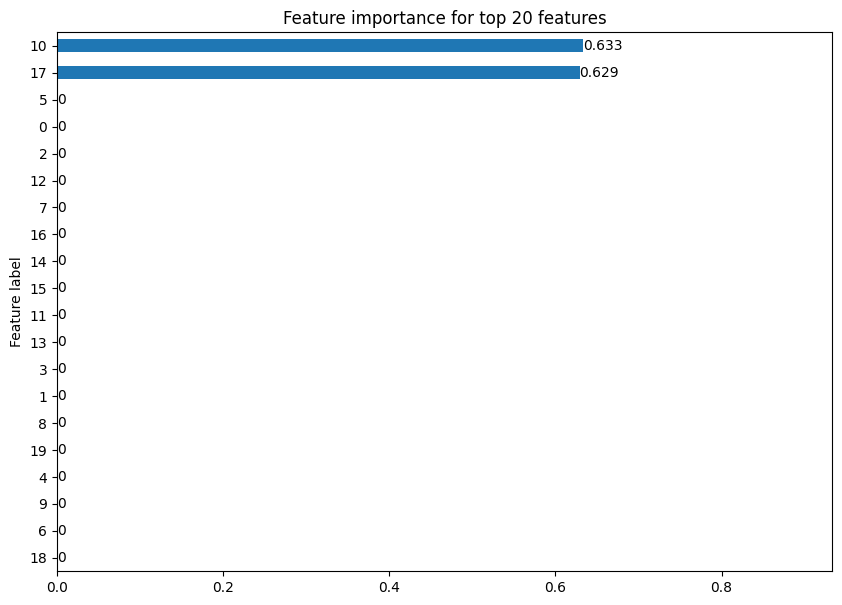

Explanation for graph jerC_Mod.4.pdb_aligned: tensor([4.1784e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.6448e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


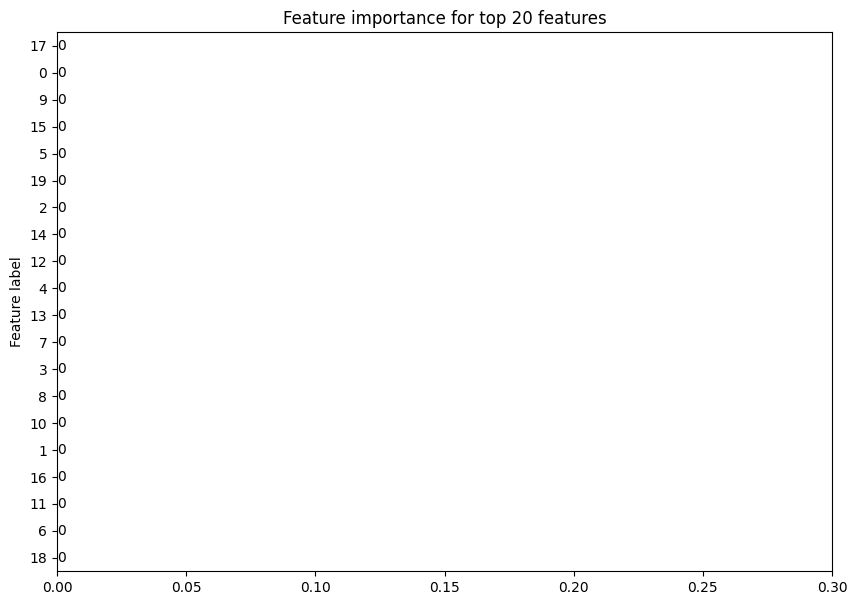

Explanation for graph revB_Mod.3.pdb_aligned: tensor([2.8486e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


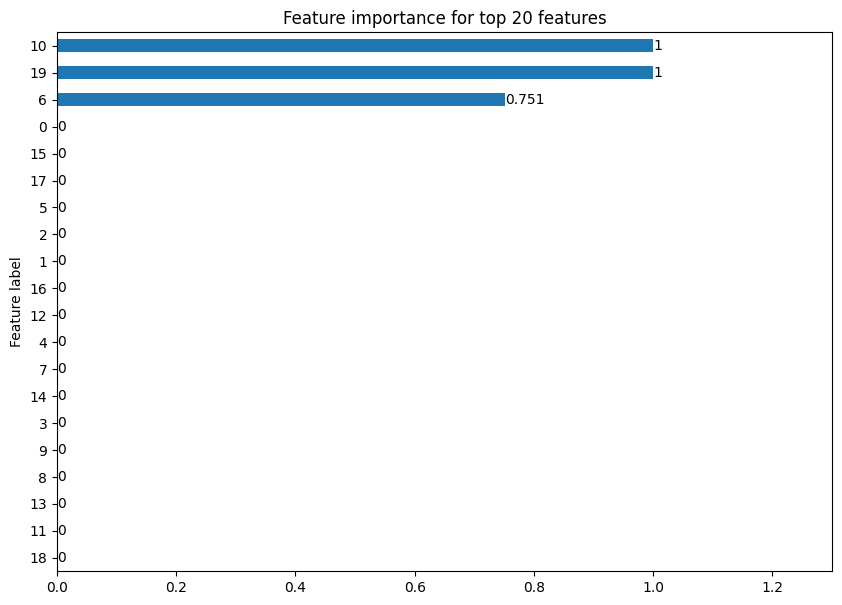

Explanation for graph ttnB_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.3492e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


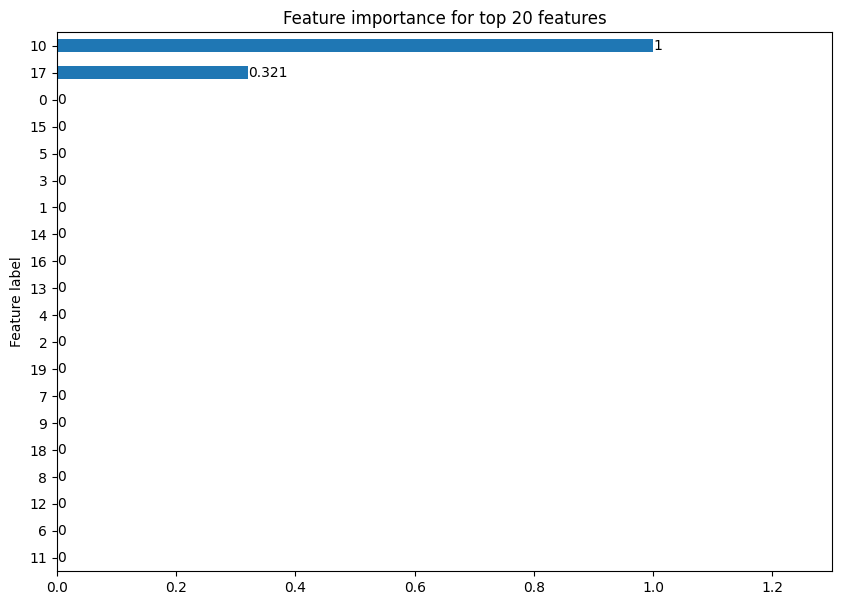

Explanation for graph sllB_Mod.5.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.3889e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


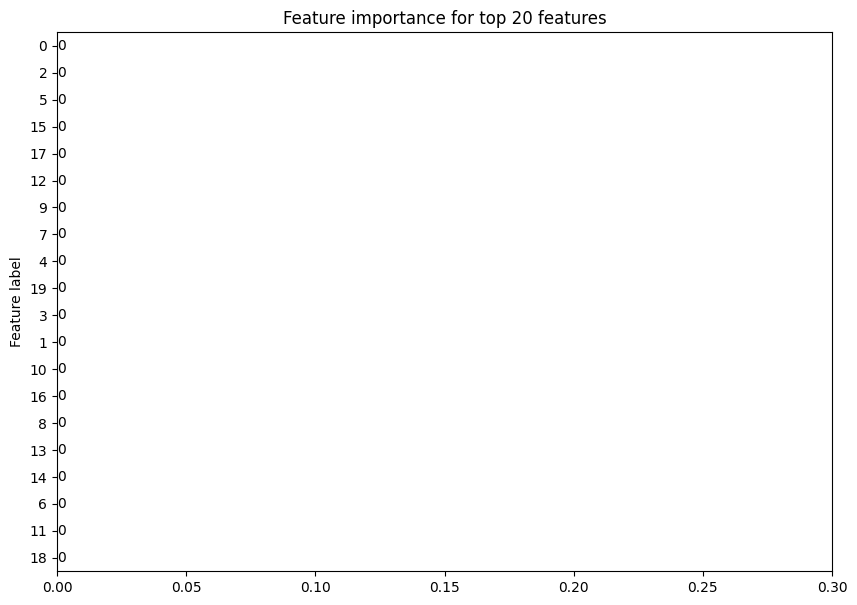

Explanation for graph vstA2_Mod.1.pdb_aligned: tensor([5.9678e-11, 0.0000e+00, 5.9668e-11,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.5165e-10, 0.0000e+00,
         0.0000e+00],
        [4.5120e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


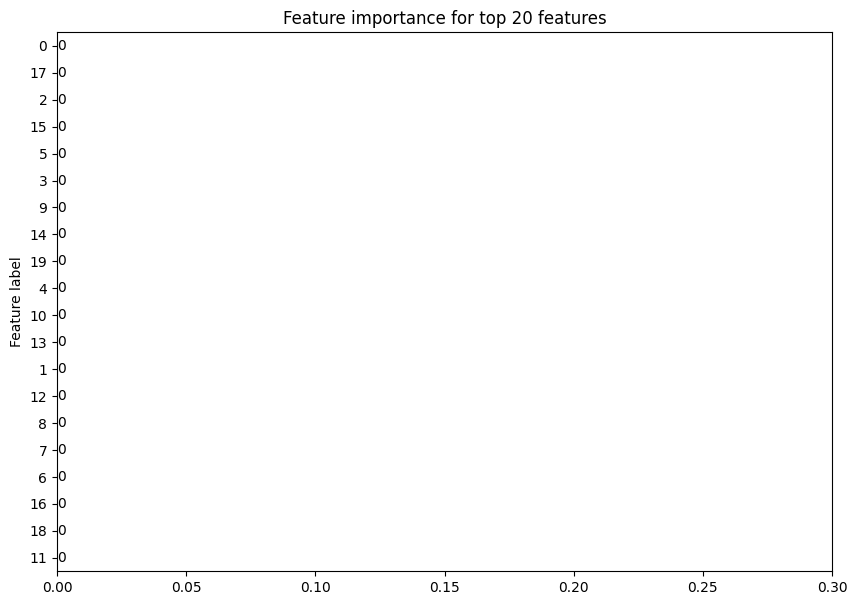

Explanation for graph cle6_Mod.2.pdb_aligned: tensor([3.3711e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


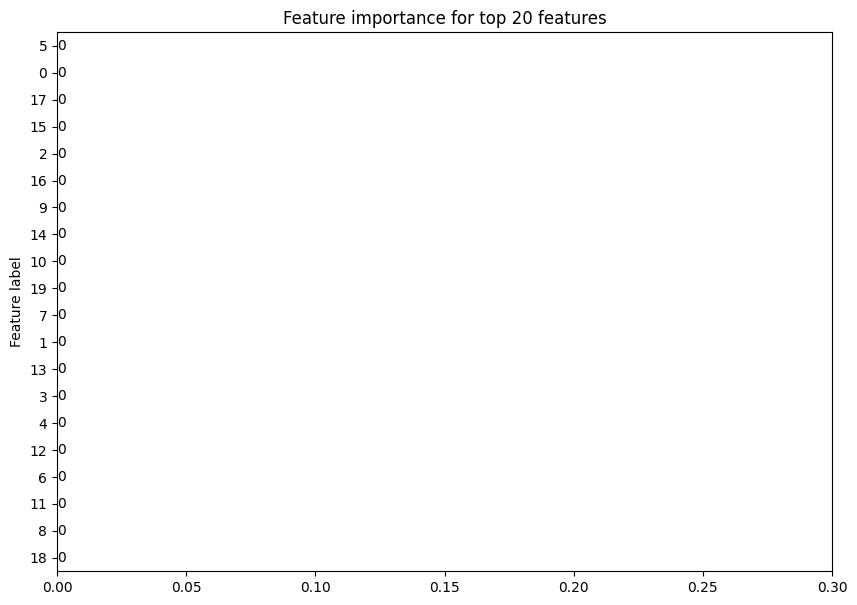

Explanation for graph gphG_Mod.2.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


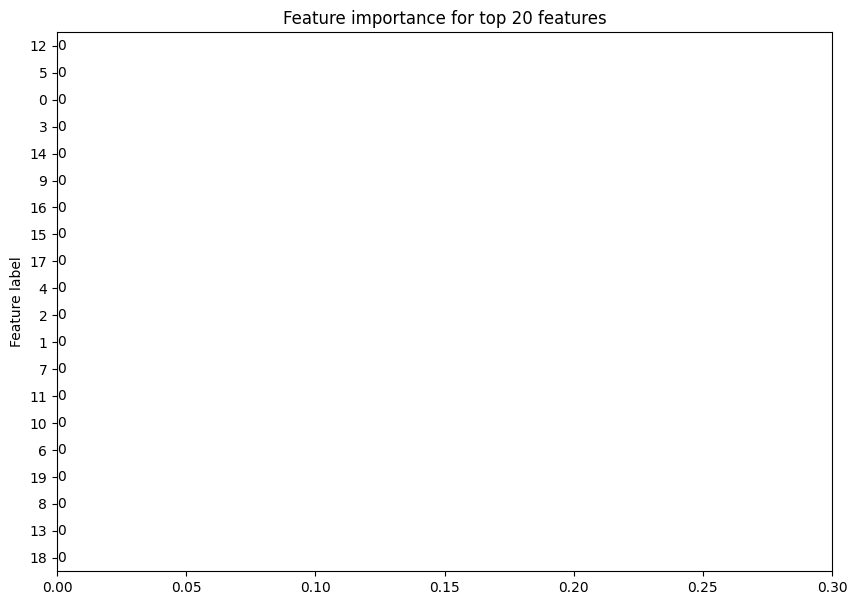

Explanation for graph borA4_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.9125e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


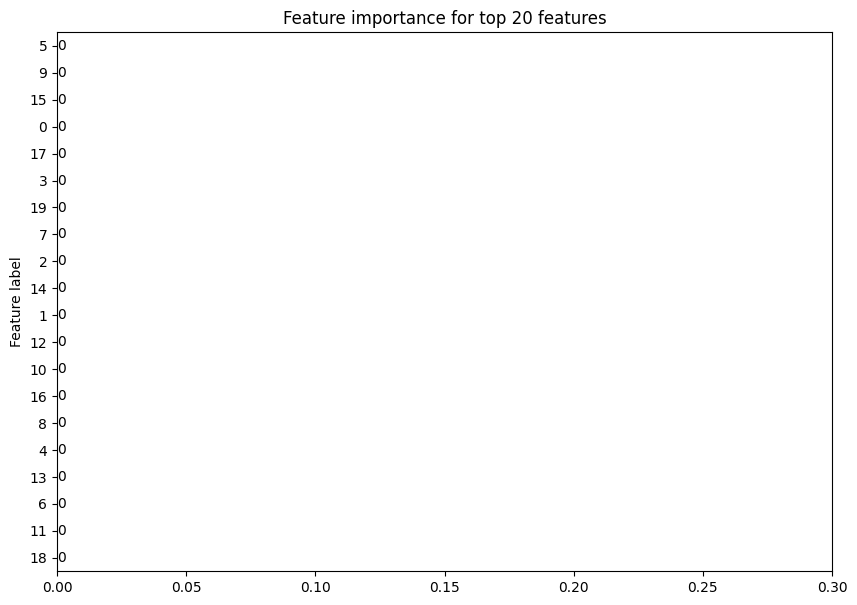

Explanation for graph epoC_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[3.3872e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.3879e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


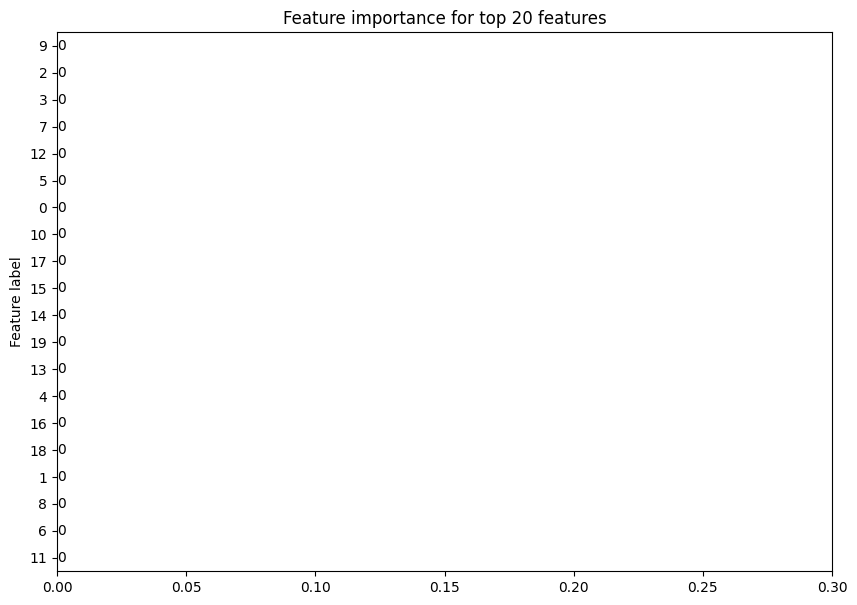

Explanation for graph lydG_Mod.15.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.0439e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


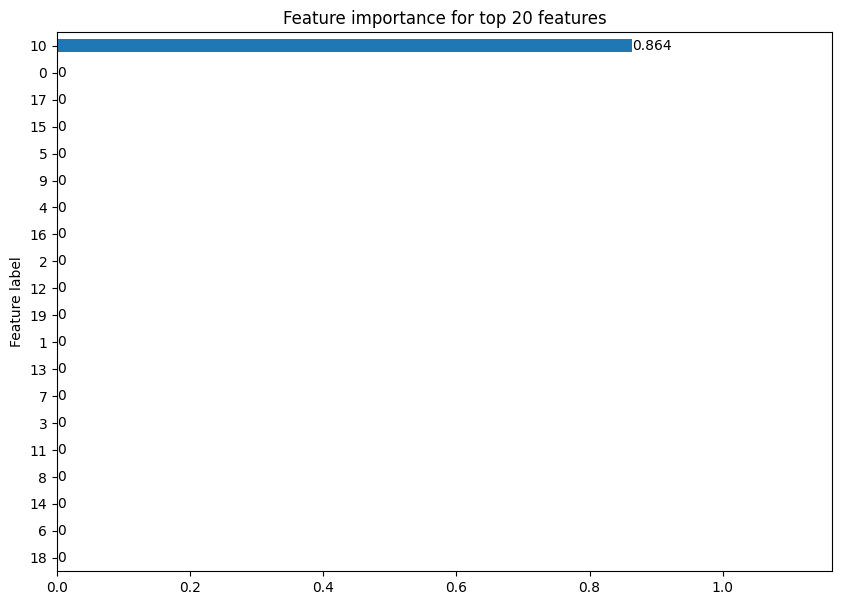

Explanation for graph lydF_Mod.11.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


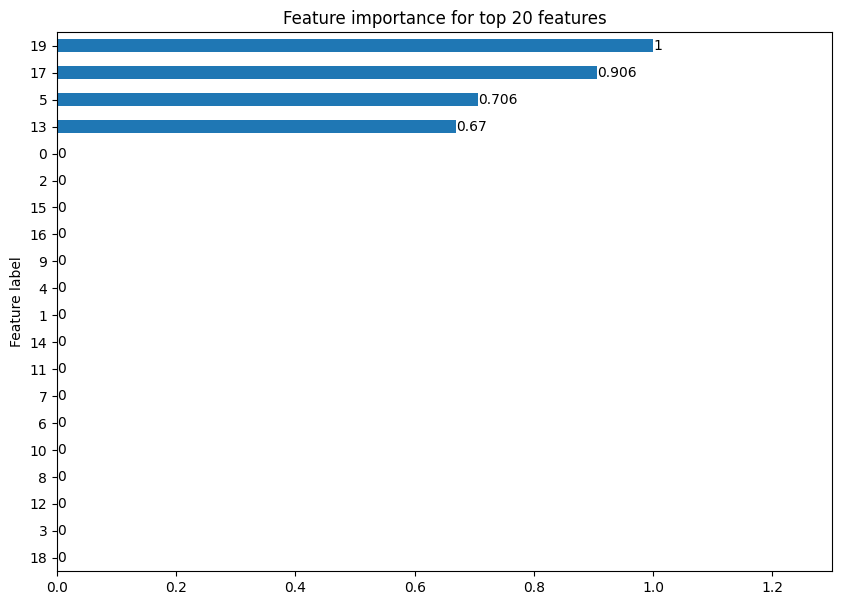

Explanation for graph rapC_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


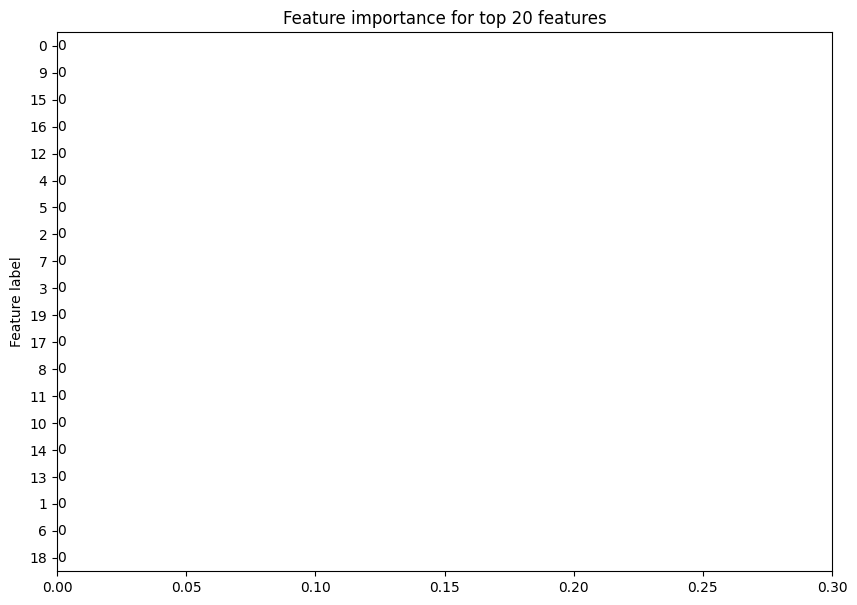

Explanation for graph olmA2_Mod.4.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.3886e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.3873e-10, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


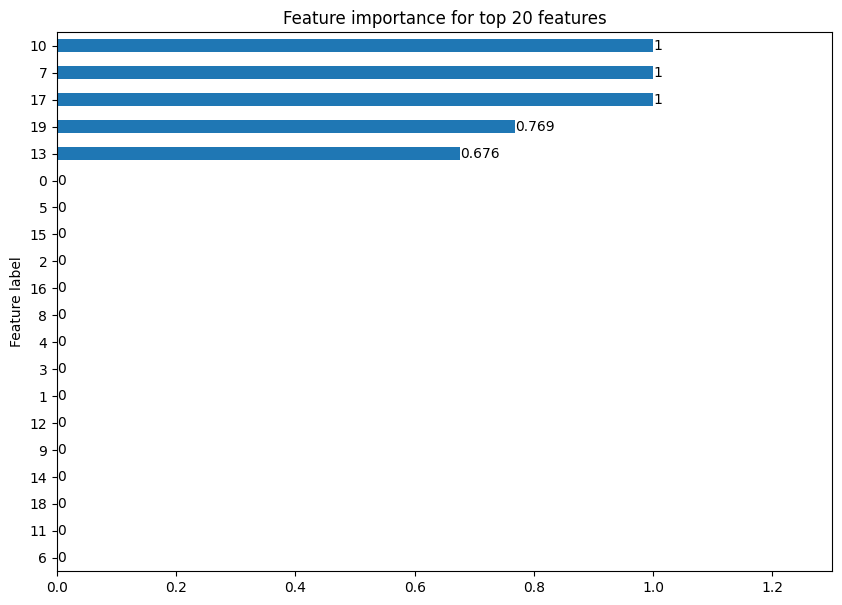

Explanation for graph btlA_Mod.2.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


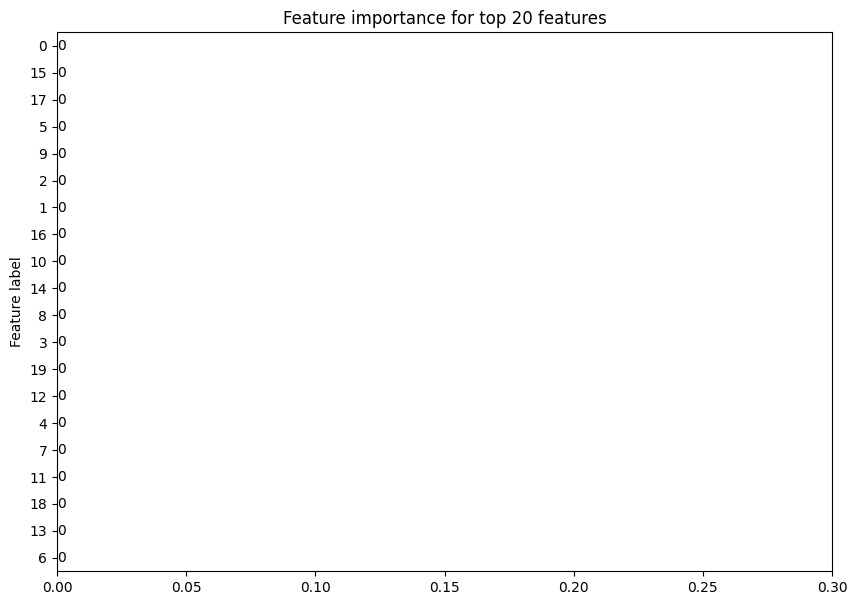

Explanation for graph hlsF_Mod.2.pdb_aligned: tensor([3.5435e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4752e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.4742e-10, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


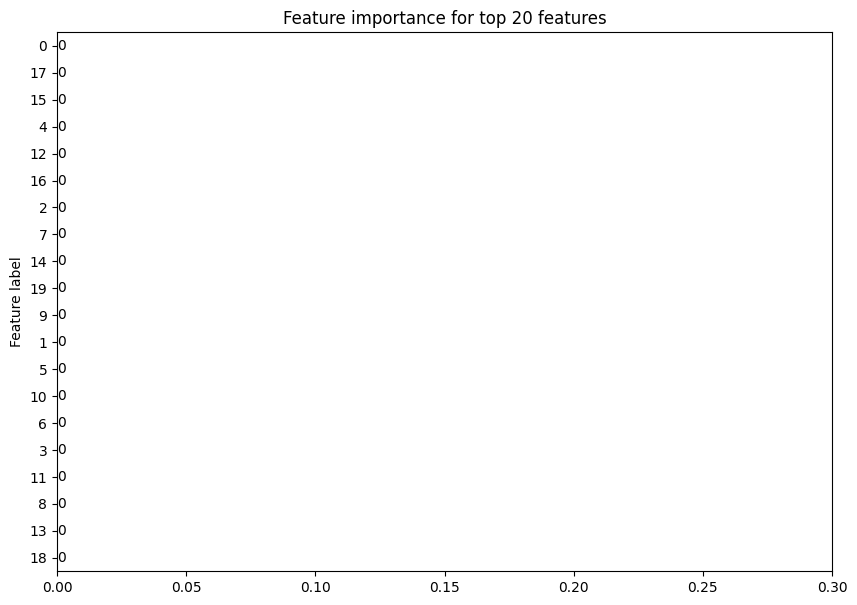

Explanation for graph hgcD_Mod.1.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.3004e-10, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


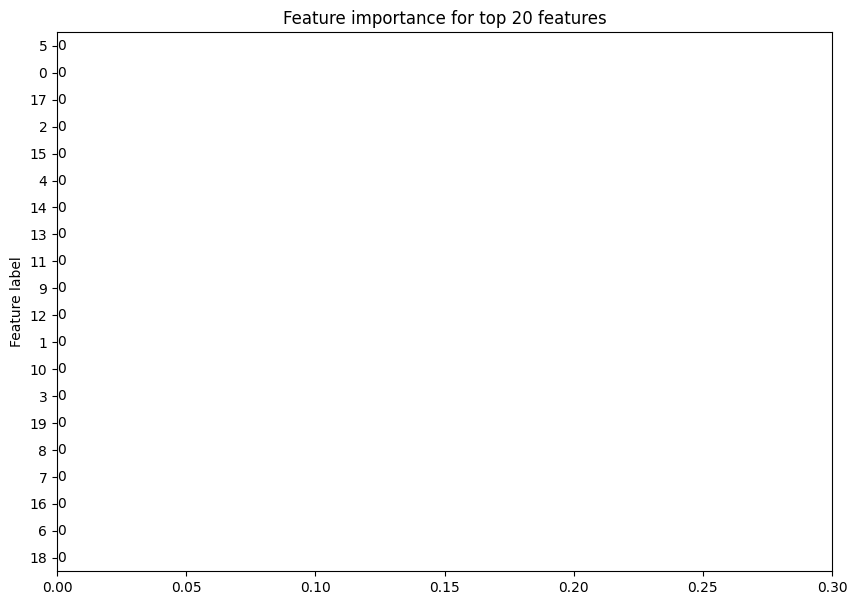

Explanation for graph SgnS1_Mod.4.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.7317e-10, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])


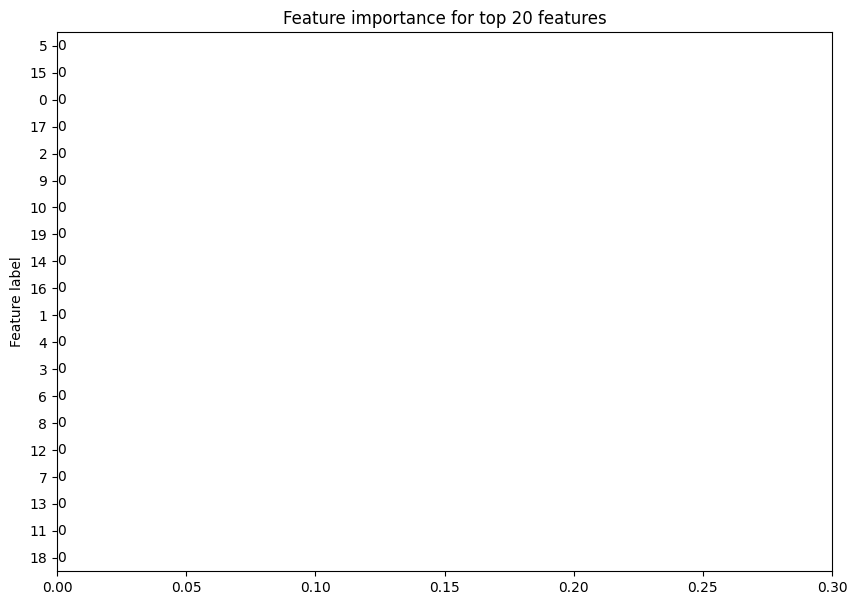

Explanation for graph fscC_Mod.6.pdb_aligned: tensor([3.1979e-11, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


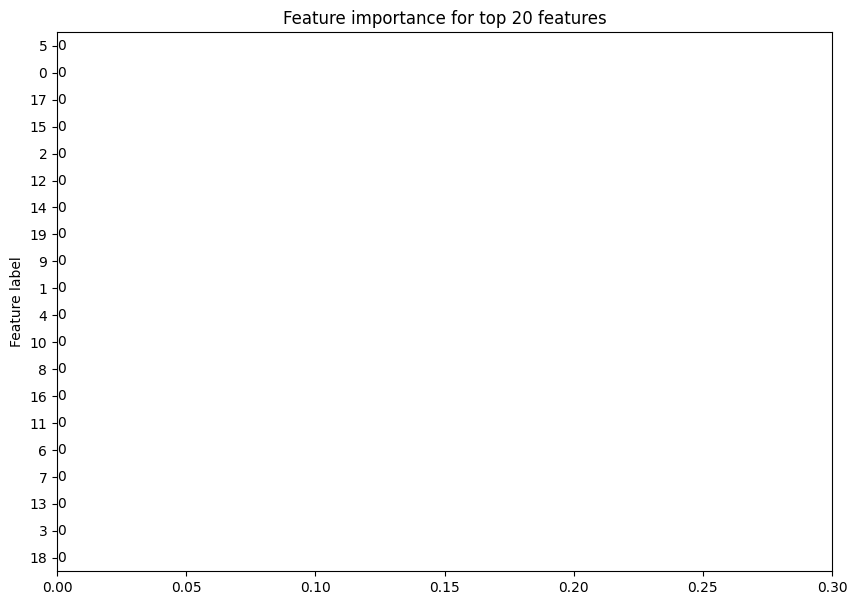

Explanation for graph monAIII_Mod.2.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


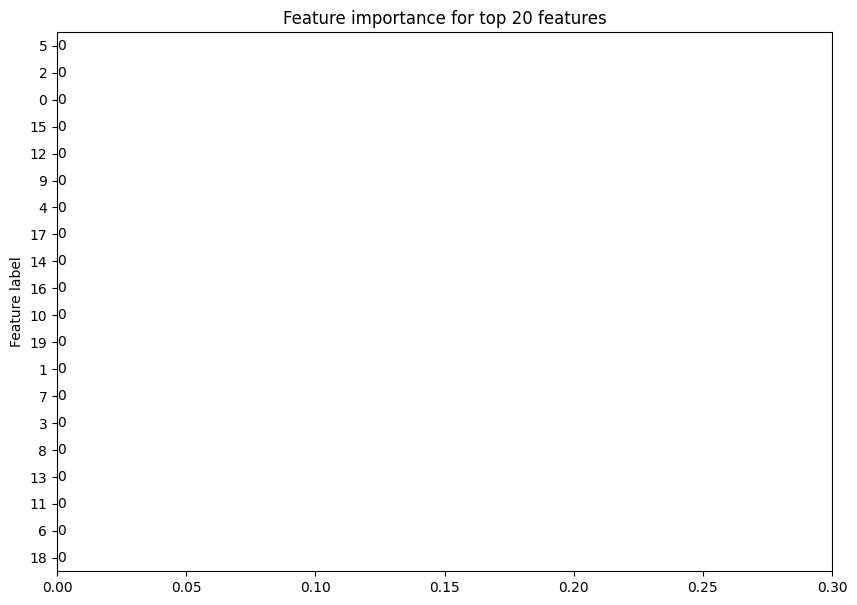

Explanation for graph conF_Mod.13.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


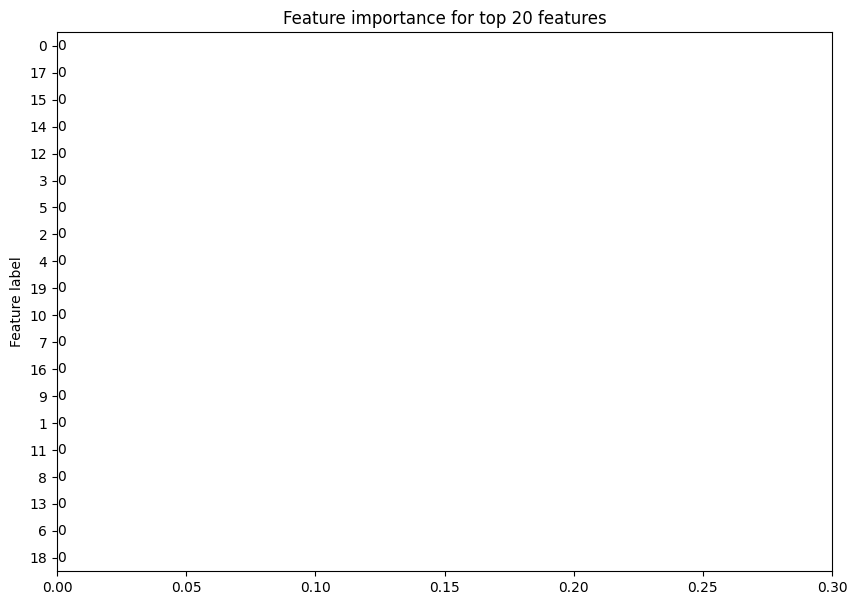

Explanation for graph revC_Mod.2.pdb_aligned: tensor([0., 0., 0.,  ..., 0., 0., 0.]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


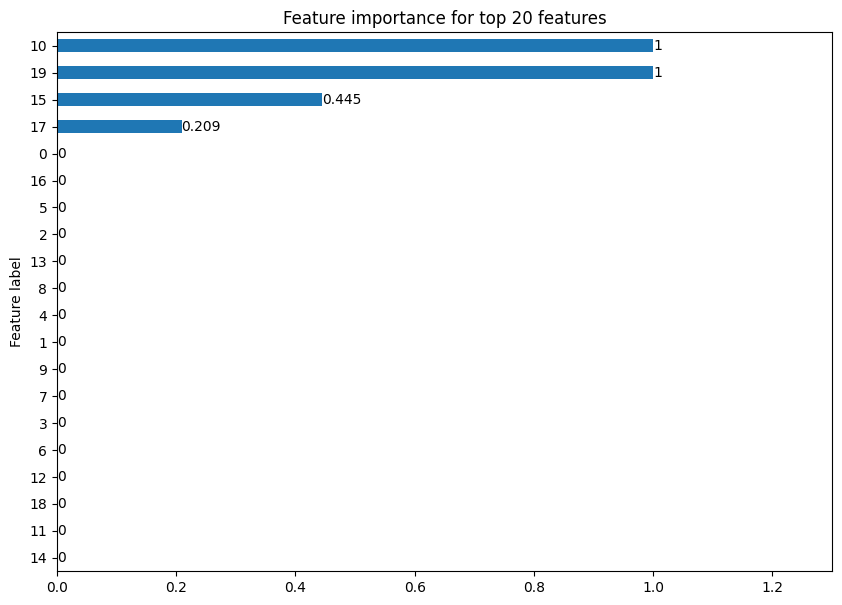

In [29]:
### Explainer loop ### 
from torch_geometric.data import Data
from torch_geometric.explain import Explainer, GNNExplainer
import torch

import numpy as np
import os
import re
from sklearn.model_selection import train_test_split
import pandas as pd

# Specify the folder where you want to save the output files
output_folder = "/home/q31032mw/Dropbox (The University of Manchester)/Max/17_ML_Project/Rank_1/20240306_binaryclass_KS_dimers_DHandERonly_graphViz3/"

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through your loader
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=100000),
    explanation_type='phenomenon', # options are model (describes the model) or phenomenon (describes why descision was made for input and input label)
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='binary_classification',
        task_level='graph',
        return_type='raw', 
    ),
)
# Iterate through your loader
loader = test_loader
for batch in loader:
    # Print some information about the current batch
    print(f"Processing batch with {batch.num_graphs} graphs")

    # Generate explanation for each graph in the batch
    for i in range(batch.num_graphs):
        # Extract data for the i-th graph in the batch
        graph_data = batch[i]

        # Create a new Data object
        data = Data(
            edge_index=graph_data.edge_index,
            node_id=graph_data.node_id,
            coords=graph_data.coords,
            name=graph_data.name,
            num_nodes=graph_data.num_nodes,
            x=graph_data.x.view(len(graph_data.node_id), 20),
        )

        # Extract the graph-level label for the current graph
        target_values = graph_data.graph_y.tolist()
        target = torch.tensor(target_values).float()

        # Generate explanation for the node at index `10`:
        explanation = explainer(x=data.x, edge_index=data.edge_index, batch=data.batch, target=target)

        # Print or do something with the explanation for the current graph
        print(f"Explanation for graph {graph_data.name}:", explanation.edge_mask, explanation.node_mask)

        # Optionally, you can visualize the feature importance for each graph
        explanation.visualize_feature_importance(top_k=20)

        # Save the output of visualize_graph to a file in the specified folder
        graphviz_output = explanation.visualize_graph(path=os.path.join(output_folder, f"graph_output_{graph_data.name}.pdf"), backend="graphviz")
        



DataBatch(x=[54200, 20], edge_index=[2, 124453], node_id=[64], coords=[54200, 3], name=[64], num_nodes=54200, graph_y=[64, 2], batch=[54200], ptr=[65])
Epoch [1/150] - Train Loss: 0.6986 - Train Accuracy: 0.5000 - Validation Loss: 0.6973 - Validation Accuracy: 0.5000
Epoch [2/150] - Train Loss: 0.6962 - Train Accuracy: 0.5000 - Validation Loss: 0.6956 - Validation Accuracy: 0.5000
Epoch [3/150] - Train Loss: 0.6943 - Train Accuracy: 0.5000 - Validation Loss: 0.6937 - Validation Accuracy: 0.5000
Epoch [4/150] - Train Loss: 0.6926 - Train Accuracy: 0.5000 - Validation Loss: 0.6921 - Validation Accuracy: 0.5000
Epoch [5/150] - Train Loss: 0.6917 - Train Accuracy: 0.5000 - Validation Loss: 0.6912 - Validation Accuracy: 0.5000
Epoch [6/150] - Train Loss: 0.6900 - Train Accuracy: 0.5000 - Validation Loss: 0.6906 - Validation Accuracy: 0.5000
Epoch [7/150] - Train Loss: 0.6892 - Train Accuracy: 0.5062 - Validation Loss: 0.6900 - Validation Accuracy: 0.5500
Epoch [8/150] - Train Loss: 0.6881 -

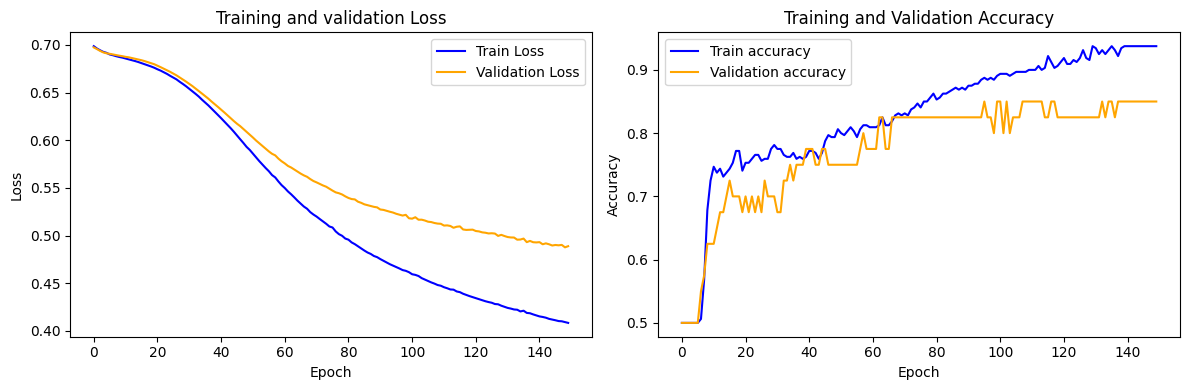

Training finished!
Test Accuracy: 0.7750


In [8]:
import torch
import torch.nn as nn
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, global_max_pool
from torch_geometric.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed
torch.manual_seed(15706112877486103401)

# Network parameters
input_dim = 20  # Corresponds to amino acid OHE
hidden_dim = 32  # Neural network density
hidden_dim2 = 8  # Neural network density
output_dim = 2   # Set model to binary classification

# Hyperparameters
num_epochs = 150
learning_rate = 0.001

# Define a GNN model with GraphSAGEConv layers
class MyGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim2, output_dim):
        super(MyGNN, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim2)
        self.lin = Linear(hidden_dim2, output_dim)

    def forward(self, x, edge_index, batch):
        # Convert input tensor 'x' to Float data type
        x = x.float()
        
        # Apply the first GraphSAGEConv layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
    
        # Apply the second GraphSAGEConv layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)
    
        # Perform graph-level pooling (e.g., global max pooling)
        x = global_max_pool(x, batch)
        x = self.lin(x)
        x = F.softmax(x, dim=1) 
    
        return x

# Initialize your GNN model
model = MyGNN(input_dim, hidden_dim, hidden_dim2, output_dim)

# Define batching
batch = next(iter(train_loader))
print(batch)

# Forward pass through the model
out = model(batch.x, batch.edge_index, batch.batch)

# Define optimization method
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Empty containers for loss and accuracy metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

## Training and validation loops ##
for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    total_correct_train = 0
    total_samples_train = 0
    
    # Training loop
    model.train()
    train_correct_count = 0  # Total number of correct predictions for the epoch
    train_total_count = 0    # Total number of samples for the epoch
    
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        out = model(batch.x, batch.edge_index, batch.batch)
        
        # Convert graph_y to binary labels
        labels = (batch.graph_y[:, 0] == 1).long()
        
        # Compute loss
        loss = F.cross_entropy(out, labels, reduction='sum')
        epoch_train_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Calculate accuracy
        predicted_labels = out.argmax(dim=1)
        train_correct_count += (predicted_labels == labels).sum().item()
        train_total_count += labels.size(0)
    
    avg_train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    
    # Calculate training accuracy
    train_accuracy = train_correct_count / train_total_count
    train_accuracies.append(train_accuracy)
    
    # Validation loop
    model.eval()
    val_loss = 0.0
    total_correct_val = 0
    total_samples_val = 0
    val_predictions = []  # New list to store predictions
    val_labels_all = []    # New list to store true labels
    
    with torch.no_grad():
        for batch in val_loader:
            batch = batch.to(device)
            out = model(batch.x, batch.edge_index, batch.batch)
    
            labels = (batch.graph_y[:, 0] == 1).long()
    
            loss = F.cross_entropy(out, labels, reduction='sum')
            val_loss += loss.item()
    
            predicted_labels = out.argmax(dim=1)
            total_correct_val += (predicted_labels == labels).sum().item()
            total_samples_val += labels.size(0)
    
            # Store predictions and true labels for each batch
            val_predictions.extend(predicted_labels.cpu().numpy())
            val_labels_all.extend(labels.cpu().numpy())
    
    # Calculate average validation loss
    avg_val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    
    # Calculate overall validation accuracy using all true labels
    val_accuracy = total_correct_val / total_samples_val
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Validation Loss: {avg_val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

# Plotting the training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train accuracy', color='blue')
plt.plot(val_accuracies, label='Validation accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("Training finished!")

### Test data ###
import torch
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from sklearn.metrics import accuracy_score

# Assuming you have your test data in a DataLoader called test_loader
# If you don't have one, create it similarly to how you created train_loader and val_loader.

# Set the model to evaluation mode
model.eval()

# Initialize variables for accuracy calculation
total_correct_test = 0
total_samples_test = 0

# Lists to store predictions and true labels for potential further analysis
test_predictions = []
test_labels = []

# Iterate through the test DataLoader
with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)  # Send data to GPU if available
        out = model(batch.x, batch.edge_index, batch.batch)
        
        # Convert graph_y to binary labels
        labels = (batch.graph_y[:, 0] == 1).long()  # Corrected line
        
        # Calculate predictions
        predicted_labels = out.argmax(dim=1)
        
        # Accumulate the number of correct predictions and total samples
        total_correct_test += (predicted_labels == labels).sum().item()
        total_samples_test += labels.size(0)

        # Store predictions and true labels
        test_predictions.extend(predicted_labels.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)

# Report the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")
